## Diabetes prediction project:




## Objective: 
To apply different Machine learning algorithms that can predict whether or not a person has the disease diabetes, based on the attributes used as input to the model. 


## Context: 
We have a report where a group of people were studied and data on certain health indicators were stored. The following data are labeled, we have a variable that tells us whether respondents have diabetes, do not have diabetes or have pre-diabetes.

While there is no cure for diabetes, strategies such as losing weight, eating healthy, staying active and receiving medical treatments can mitigate the damage of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models of diabetes risk important tools for the public and public health officials.

## Explanation of the columns: 

Diabetes: has 3 classes, 0 is without diabetes or only during pregnancy, 1 is for prediabetes and 2 is for diabetes. 

HighBP: Patient with high blood pressure (0,1). 

HighChol: Patient with high cholesterol (0,1). 

CholCheck: cholesterol control in the last five years (0,1).

BMI: Body mass index.

Smoker: Have you smoked at least 100 cigarettes in your lifetime (0,1). 

Stroke: Patient who suffered a stroke (0,1) Infarction: Patient who suffered a heart attack (0,1) 

PhysActivity: Adults who reported physical activity or exercise during the last 30 days in addition to their usual work (0,1) 

Fruits: Consume one fruit or more per day (0,1) 

Veggies: Consume vegetables one or more times per day (0,1)

HvyAlcoholConsump: Heavy drinkers (adult men who drink more than 14 drinks per week and adult women who drink more than 7 drinks per week) (0,1) 

AnyHealthcare: Patient with social work (0,1) 

NoDocbcCost: Was there a time in the last 12 months when you needed to see a doctor but could not because of cost (0,1)?

GenHlth: Patient's overall health is: rate (1 ~ 5) 

MentHlth: mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30) 

PhysHlth: physical health, which includes physical illnesses and injuries, for how many days during the last 30 days was your physical health not good?

DiffWalk: Do you have serious difficulties walking or climbing stairs (0,1)? 

Sex: respondent's sex (0,1) (Female or Male) 

Age: Fourteen-level age category (1 ~ 14) 

Education: Highest grade or year of school completed (1 ~ 6) 

Income: Annual household income from all sources (If respondent refuses at any income level, code "Refused") (1 ~ 8) (USD)

### Source: 
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

## Import tools we need:

In [295]:
# Basic imports:
import pandas as pd
import numpy as np
import math

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import NearMiss
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Metrics libraries:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Other libraries:
import joblib
from scipy.stats import randint as sp_randint

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

## Carga del dataset y primer acercamiento a los datos 

In [296]:
data = pd.read_csv(
    r"C:\Users\andre\Desktop\Scripts\DATASETS\CSV\Diabetes Health Indicators Dataset\diabetes_012_health_indicators_BRFSS2015.csv")

In [297]:
data.shape

(253680, 22)

In [298]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [299]:
data.sample(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
244757,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,5.0,8.0
120715,0.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,20.0,0.0,0.0,1.0,7.0,5.0,3.0
131118,2.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
117611,2.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
208234,0.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,10.0,30.0,1.0,0.0,8.0,6.0,4.0


In [300]:
data.dtypes 

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

## Column data type transformation

In [301]:
data["Diabetes_012"] = data["Diabetes_012"].astype(int)
data['HighBP'] = data['HighBP'].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [302]:
data.dtypes 

Diabetes_012            int32
HighBP                  int32
HighChol                int32
CholCheck               int32
BMI                     int32
Smoker                  int32
Stroke                  int32
HeartDiseaseorAttack    int32
PhysActivity            int32
Fruits                  int32
Veggies                 int32
HvyAlcoholConsump       int32
AnyHealthcare           int32
NoDocbcCost             int32
GenHlth                 int32
MentHlth                int32
PhysHlth                int32
DiffWalk                int32
Sex                     int32
Age                     int32
Education               int32
Income                  int32
dtype: object

## Null check:

In [303]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Check duplicate values:

In [304]:
data.duplicated().sum()

23899

In [305]:
# Now we delete duplicate values & check the result:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

print(f"The number of duplicate values is: {data.duplicated().sum()}. And the dataframe shape is: {data.shape}")

The number of duplicate values is: 0. And the dataframe shape is: (229781, 22)


Cases of pre-diabetes will be taken as diabetes to encompass the classification into diabetic or non-diabetic.

In [307]:
data['Diabetes_012'].unique()

array([0, 2, 1])

In [308]:
data.Diabetes_012 = data.Diabetes_012.replace({2: 1})
data = data.rename(columns={'Diabetes_012':'Diabetes'})

In [309]:
data.head(2)

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1


In [310]:
# Copy the original dataframe to work with this:
data1 = data.copy()

## We modified the columns to improve data readability.

In [311]:
age_ranges = ['18-24', '25-29', '30-4', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-85', '+85']
for i, age_range in enumerate(age_ranges, start=1):
    data1.Age[data['Age'] == i] = age_range

In [312]:
data1.HighBP[data['HighBP'] == 0] = 'No'
data1.HighBP[data['HighBP'] == 1] = 'Yes'

In [313]:
data1.HighChol[data['HighChol'] == 0] = 'No'
data1.HighChol[data['HighChol'] == 1] = 'Yes'

In [314]:
data1.CholCheck[data['CholCheck'] == 0] = 'No'
data1.CholCheck[data['CholCheck'] == 1] = 'Yes'


In [315]:
data1.Smoker[data['Smoker'] == 0] = 'No'
data1.Smoker[data['Smoker'] == 1] = 'Yes'

In [316]:
data1.Stroke[data['Stroke'] == 0] = 'No'
data1.Stroke[data['Stroke'] == 1] = 'Yes'

In [317]:
data1.PhysActivity[data['PhysActivity'] == 0] = 'No'
data1.PhysActivity[data['PhysActivity'] == 1] = 'Yes'


In [318]:
data1.Fruits[data['Fruits'] == 0] = 'No'
data1.Fruits[data['Fruits'] == 1] = 'Yes'

In [319]:
data1.Veggies[data['Veggies'] == 0] = 'No'
data1.Veggies[data['Veggies'] == 1] = 'Yes'

In [320]:
data1.HvyAlcoholConsump[data['HvyAlcoholConsump'] == 0] = 'No'
data1.HvyAlcoholConsump[data['HvyAlcoholConsump'] == 1] = 'Yes'

In [321]:
data1.AnyHealthcare[data['AnyHealthcare'] == 0] = 'No'
data1.AnyHealthcare[data['AnyHealthcare'] == 1] = 'Yes'

In [322]:
data1.Sex[data['Sex'] == 0] = 'Woman'
data1.Sex[data['Sex'] == 1] = 'Man'

In [323]:
health_ratings = ['Very bad', 'Bad', 'Good', 'Very good', 'Excelent']
for i, health_rating in enumerate(health_ratings, start=1):
    data1.GenHlth[data['GenHlth'] == i] = health_rating

In [324]:
data1.DiffWalk[data['DiffWalk'] == 0] = 'No'
data1.DiffWalk[data['DiffWalk'] == 1] = 'Yes'

In [325]:
data1.NoDocbcCost[data['NoDocbcCost'] == 0] = 'No'
data1.NoDocbcCost[data['NoDocbcCost'] == 1] = 'Yes'

In [326]:
data1.HeartDiseaseorAttack[data['HeartDiseaseorAttack'] == 0] = 'No'
data1.HeartDiseaseorAttack[data['HeartDiseaseorAttack'] == 1] = 'Yes'

In [327]:
# data1.Education[data['Education'] == 1] = 'Nunca asistió a la escuela'
# data1.Education[data['Education'] == 2] = 'Primario o secundario incompleto'
# data1.Education[data['Education'] == 3] = 'Primario completo'
# data1.Education[data['Education'] == 4] = 'Secundario completo'
# data1.Education[data['Education'] == 5] = 'Universitario'
# data1.Education[data['Education'] == 6] = 'Doctorado-Posgrado'

data1.Education[data['Education'] == 1] = 'Never attended school'
data1.Education[data['Education'] == 2] = 'Incomplete elementary or high school'
data1.Education[data['Education'] == 3] = 'Completed elementary school'
data1.Education[data['Education'] == 4] = 'Secondary complete'
data1.Education[data['Education'] == 5] = 'College'
data1.Education[data['Education'] == 6] = 'Doctorate-PhD'

# education_levels = ['Nunca asistió a la escuela', 'Primario o secundario incompleto', 'Primario completo', 'Secundario completo', 'Universitario', 'Doctorado-Posgrado']
# for i, education_level in enumerate(education_levels, start=1):
#     data1.Education[data['Education'] == i] = education_level

# education_levels = {
#     1: 'Nunca asistió a la escuela',
#     2: 'Primario o secundario incompleto',
#     3: 'Primario completo',
#     4: 'Secundario completo',
#     5: 'Universitario',
#     6: 'Doctorado-Posgrado'
# }

# for key, value in education_levels.items():
#     data1.Education[data['Education'] == key] = value

In [328]:
bmi_ranges = [(0, 18.5, 'insufficient weight'), (18.5, 24.9, 'healthy weight'), (25, 29.9, 'overweight'), (30, float('inf'), 'obesidad')]
for lower, upper, label in bmi_ranges:
    data1.BMI[(data['BMI'] > lower) & (data['BMI'] <= upper)] = label

## EDA
Now we dome some extra exploratory analysis, in this case we paint the heat map to better understand the correlation in the data.

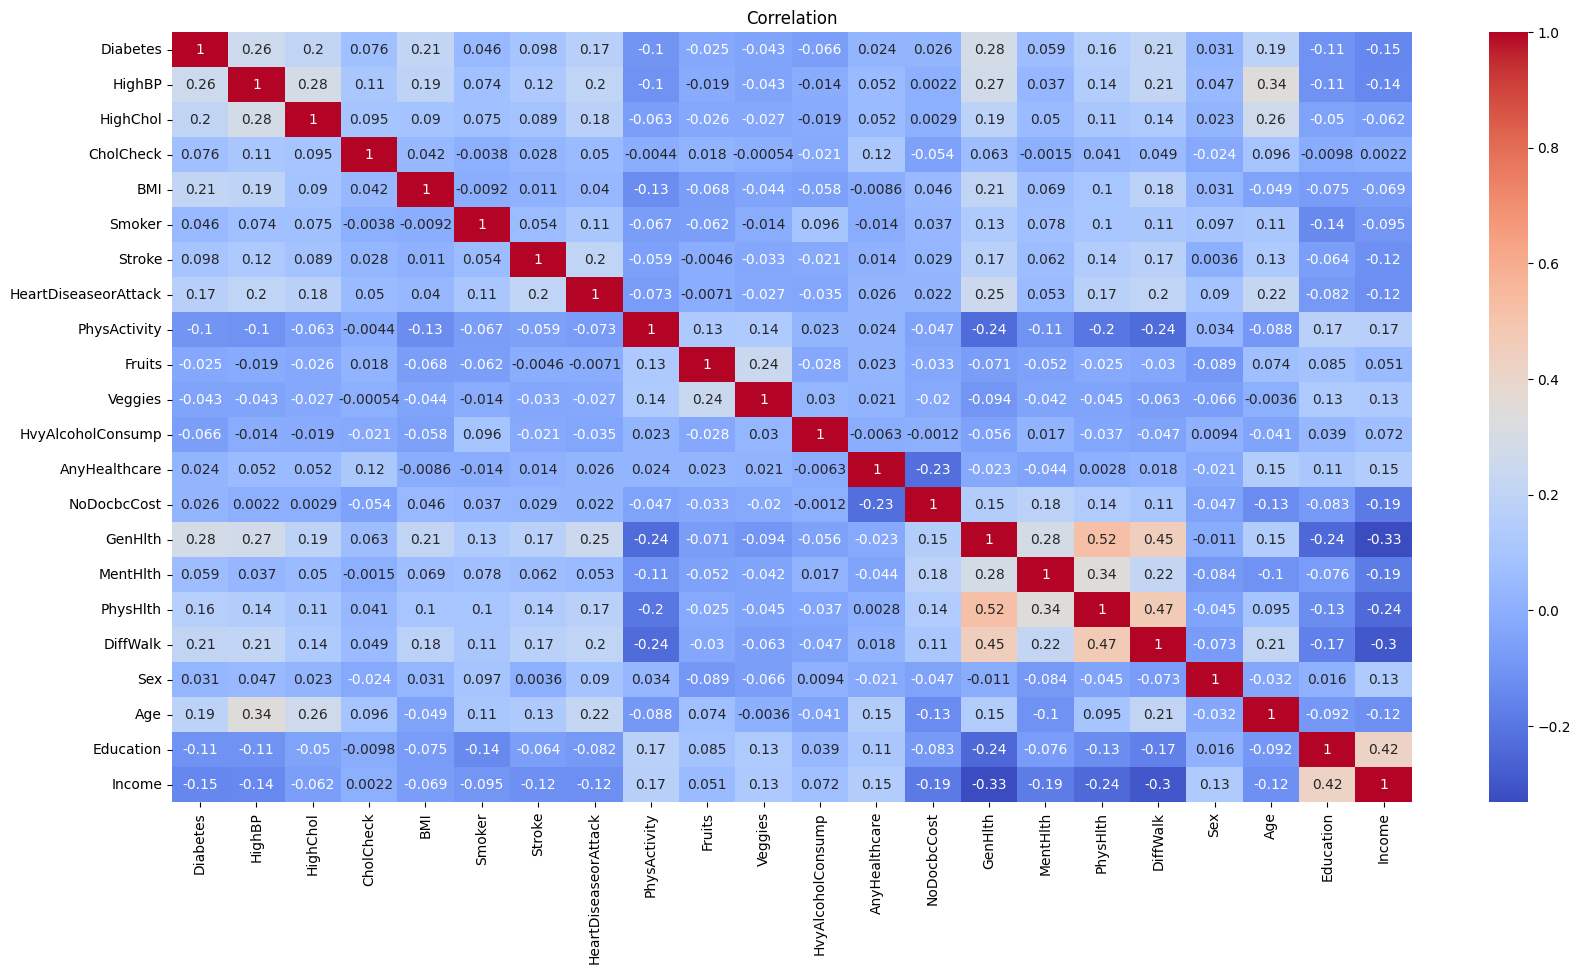

In [329]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='coolwarm' )
plt.title("Correlation")
plt.show()

The correlation heat map shows the relationship between the columns. Correlations between 0.5 and 0.8 are moderate correlations and do not allow to make very clear decisions and correlations above 0.8 are high and do imply a clear correlation between both variables. In our dataset we can observe a moderate correlation between physical health days and health ratio, which makes sense since both columns speak of the respondent's perception of his health status.

Let's plot the histogram to better understand the data in the columns.

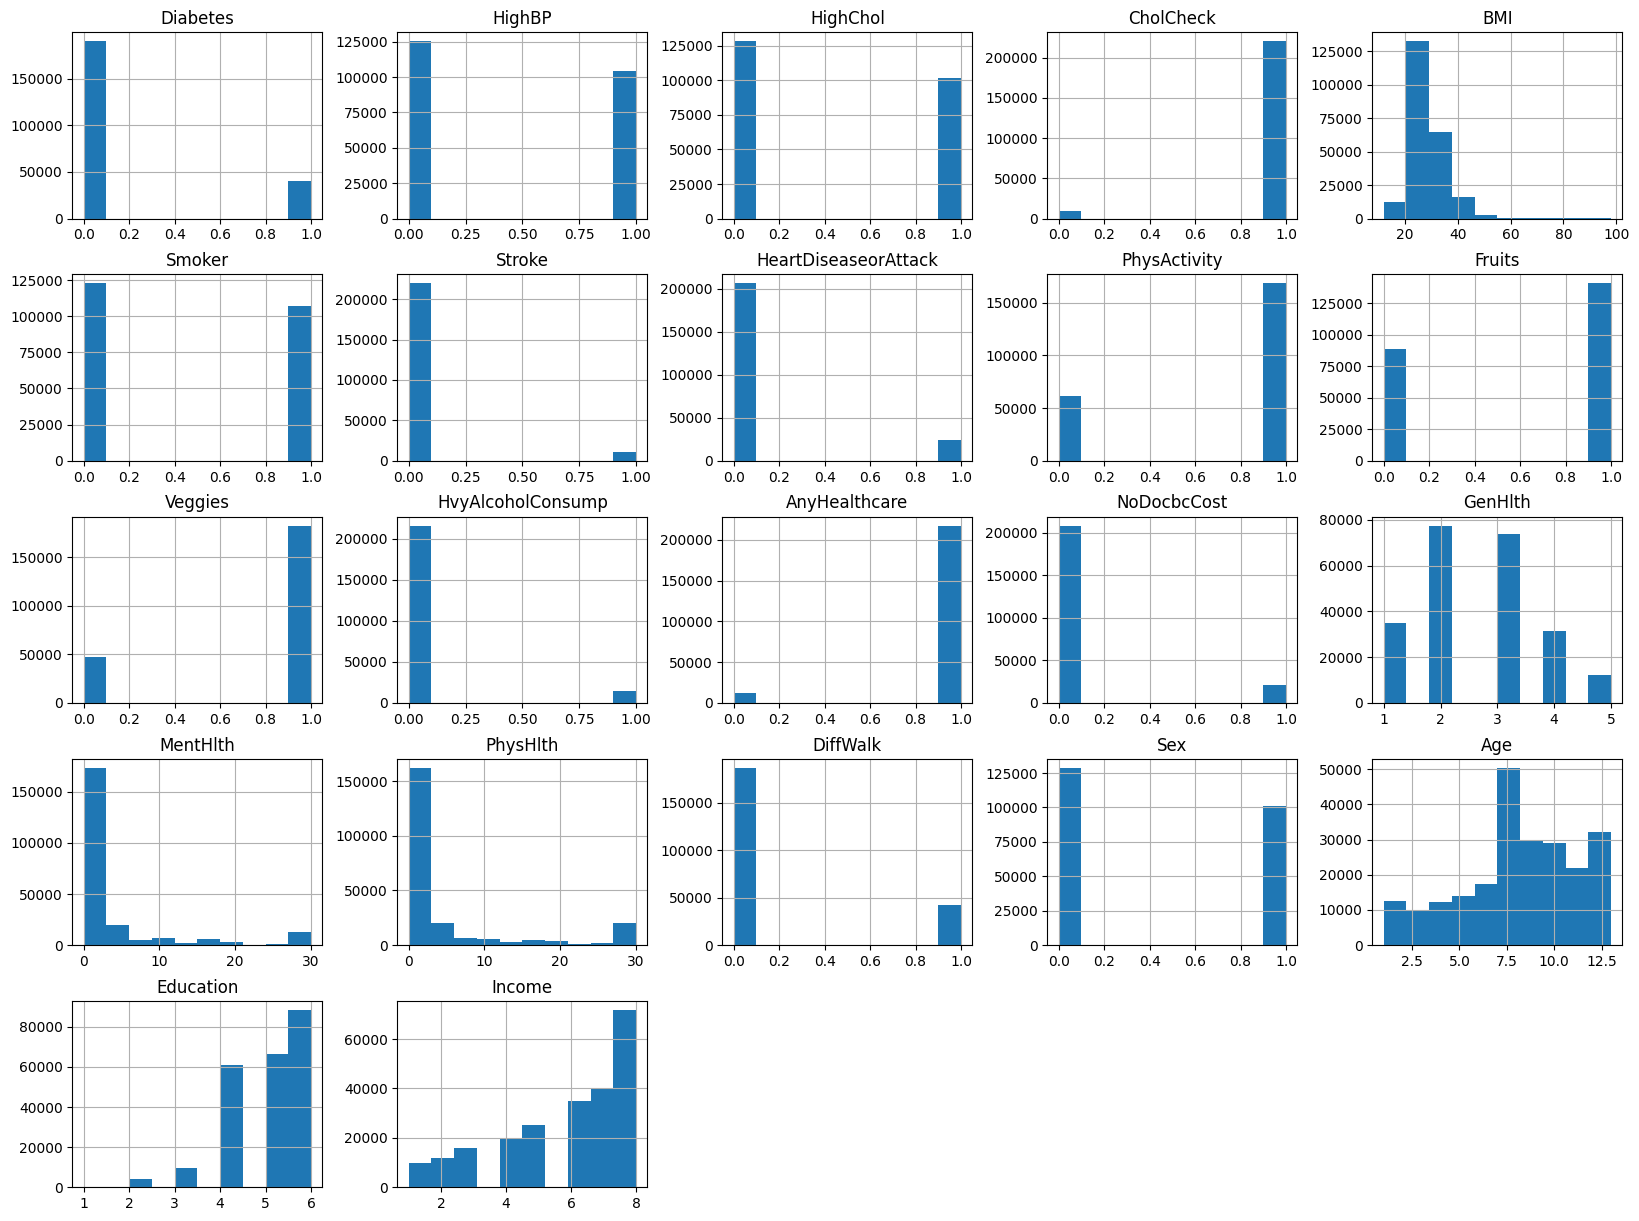

In [330]:
data.hist(figsize=(20,15))
plt.show()

From the graphs we can observe:

    1) there are more women than men in the study.
    2) The majority of the respondents consume fruits and vegetables, and a small amount consumes alcohol.
    3) The majority of the respondents achieved a higher level of education.
    4) The majority of the respondents have a social security system.
    5) The majority of the respondents had no problems paying for a medical consultation in the last 12 months.
    6) In the histogram of the health_ratio column, we can see that the category with more results is the one that perceives their health as bad. 
    7) We can see a similarity in the distribution of physical health days and mental health days, so we can infer that those who perceive their physical health in days as bad or good, perceive their mental health in the same way. 
    8) The majority of respondents have a BMI in the range of 20 to 30. 
    9) The majority of the respondents reported being physically active. 
    10) There is an imbalance between the diabetic and non-diabetic classes.

## Outliers detection:

Let us consider only those attributes whose response can be different from 0 and 1.

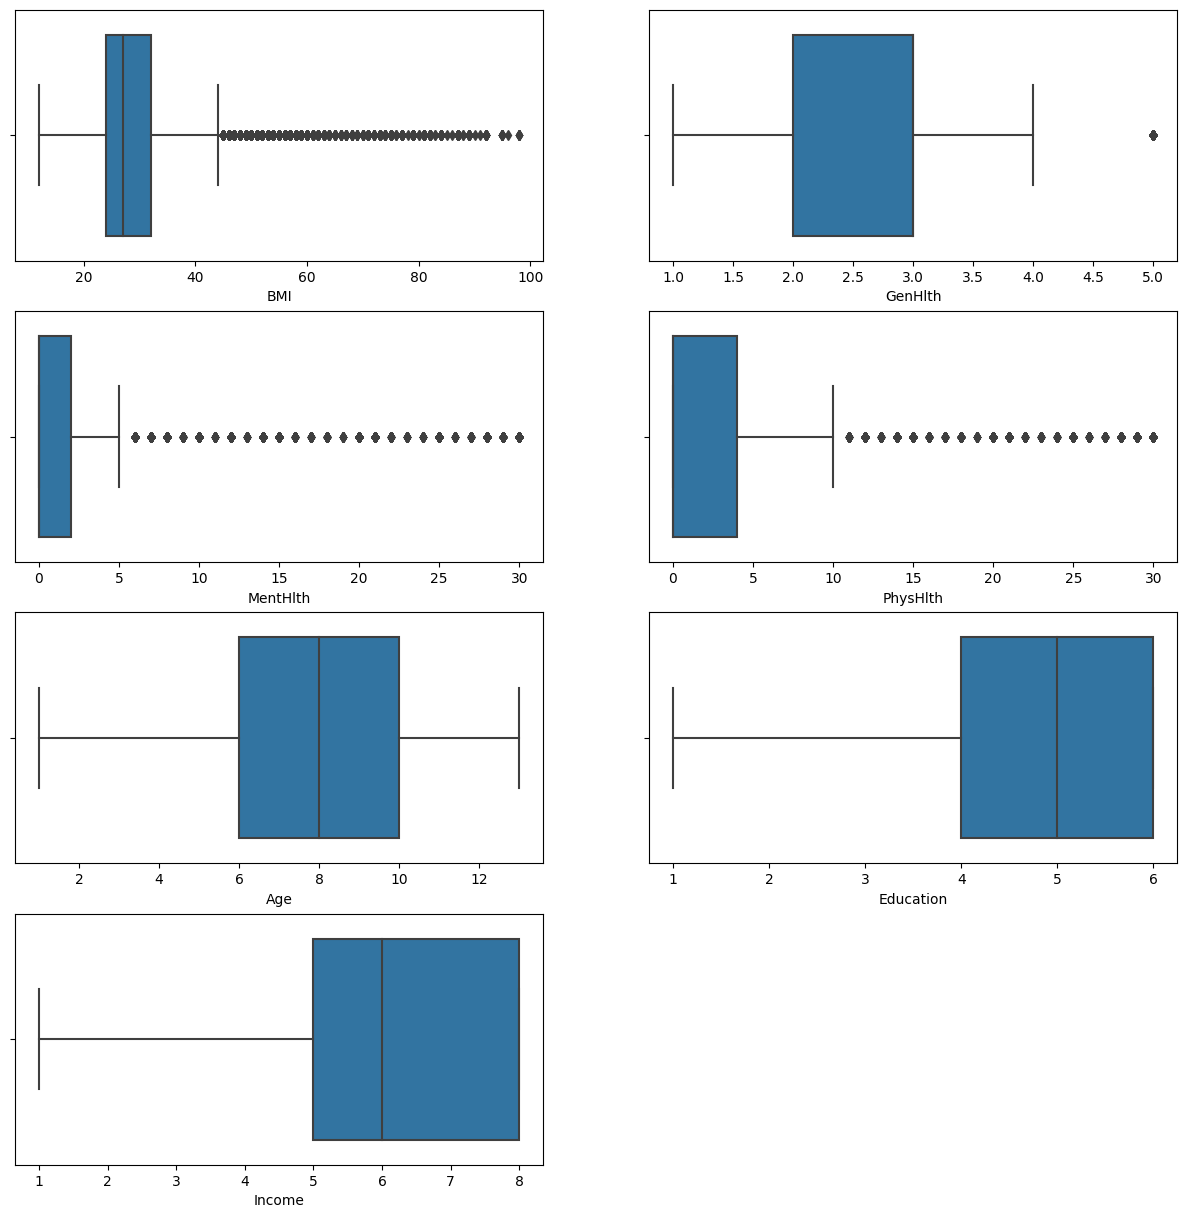

In [332]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data )
plt.show()

In [333]:
variables_outliers = data[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']]

<Axes: xlabel='BMI', ylabel='Density'>

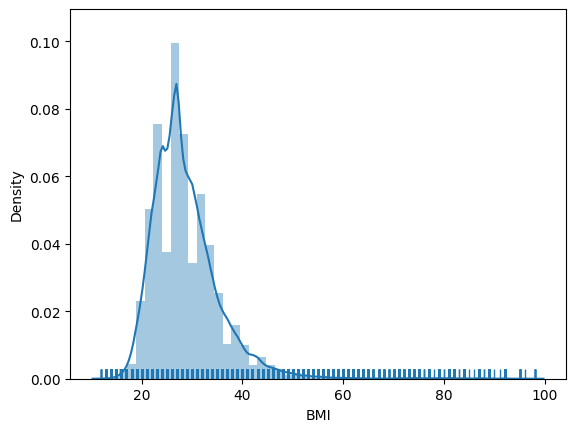

In [334]:
sns.distplot(data['BMI'], hist=True, kde=True, rug=True)

<Axes: xlabel='GenHlth', ylabel='Density'>

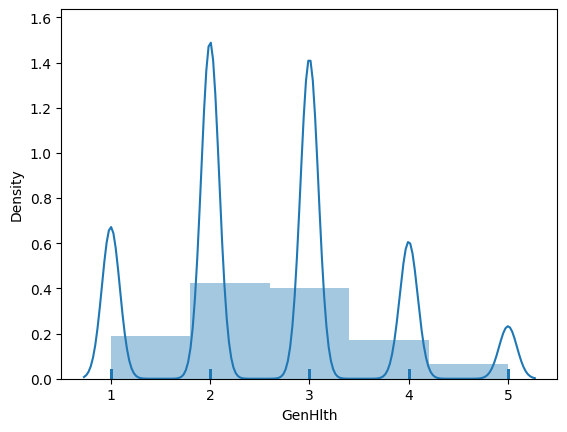

In [335]:
sns.distplot(data['GenHlth'], hist=True, kde=True, rug=True, bins=5)

<Axes: xlabel='PhysHlth', ylabel='Density'>

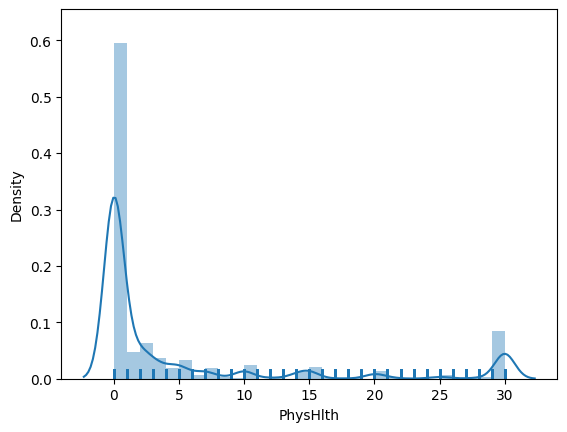

In [336]:
sns.distplot(data['PhysHlth'], hist=True, kde=True, rug=True, bins=30)

<Axes: xlabel='MentHlth', ylabel='Density'>

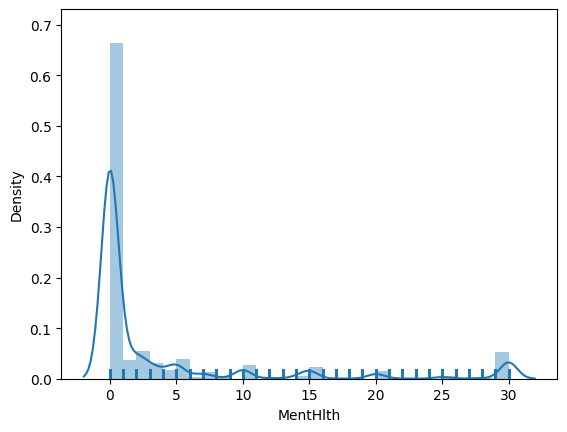

In [337]:
sns.distplot(data['MentHlth'], hist=True, kde=True, rug=True, bins=30)

In [338]:
# Mean vs median
mean = variables_outliers.mean(axis=0)
median = variables_outliers.median(axis=0)

pd.concat([mean, median, mean-median], axis=1, keys=["Mean", "Median", "Diference"])

,Mean,Median,Diference
BMI,28.685670,27.0,1.685670
GenHlth,2.601151,3.0,-0.398849
MentHlth,3.505373,0.0,3.505373
PhysHlth,4.675178,0.0,4.675178


In [339]:
# Obtain 1.5 interquartile range
iqrx15 = (variables_outliers.quantile(.75)-variables_outliers.quantile(.25))*1.5
# Obtain the maximum values
maxs = variables_outliers.max()
# Get the minimum values
mins = variables_outliers.min()
# Define an upper bound equal to the median plus 1.5 times the interquartile range
sup = median+iqrx15
# Define a lower bound equal to the median minus 1.5 times the interquartile range
inf = median-iqrx15
# Check if the maximum values are beyond the upper limit
out_sup = maxs>sup
# Check if the minimum values are beyond the lower limit
out_inf = mins<inf
# Show for which variables there are outliers
pd.concat([out_sup, out_inf], axis=1, keys=["Outlier Sup", "Outlier Inf"])

,Outlier Sup,Outlier Inf
BMI,True,True
GenHlth,True,True
MentHlth,True,False
PhysHlth,True,False


A common approach to handling outliers is to simply remove them from our data set. This method can be effective if the outliers are few and can be clearly identified. However, this approach may not always be the best option, as it can result in the loss of valuable data and potentially bias the predictions of our model.
For this particular project we will not remove outliers, but will instead use the log transformation technique. This technique will be applied on the BMI and health_ratio attributes that have upper and lower outliers. The mental and physical health day columns will not be transformed, but will be normalized with Standar Scaler before training the models.


<Axes: xlabel='BMI', ylabel='Density'>

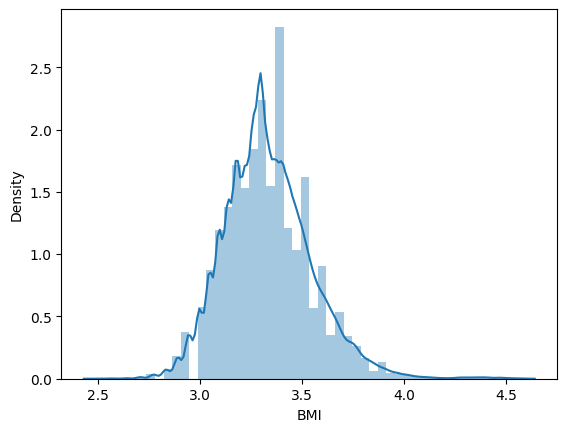

In [340]:
a=np.log(data['BMI'])
sns.distplot(a)

<Axes: xlabel='GenHlth', ylabel='Density'>

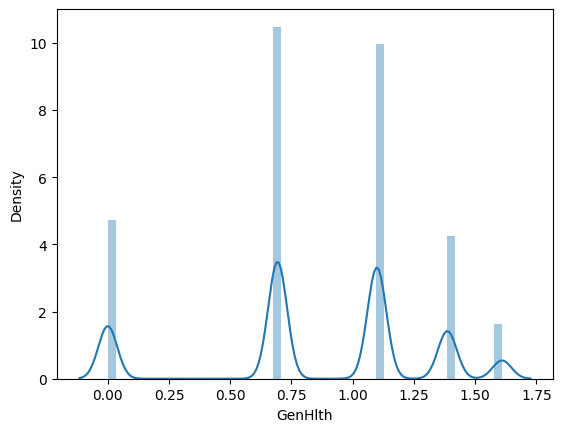

In [341]:
b=np.log(data['GenHlth'])
sns.distplot(b)

In [342]:
data['BMI']= a
data['GenHlth'] = b

## Hypotheses posed: 

The older the age the greater the risk of having diabetes?

Does high blood pressure increase the risk of diabetes? 

Does high cholesterol increase the risk of diabetes?

Does being a smoker increase the risk of diabetes?

Having suffered a stroke or heart attack increases the risk of having diabetes?

Not eating fruits and vegetables increases the risk of diabetes?

Drinking alcohol increases the risk of having diabetes?

Not being physically active increases the risk of having diabetes?

Do people with difficulty walking have a higher risk of having diabetes? 

Is there any relationship between the income level of the respondents and the disease of diabetes?

Is there any relationship between the level of education of the respondents and the disease of diabetes?

What is the relationship between gender and diabetes disease?

Are people with BMI between 25.0 and 29.9 (overweight) or BMI greater than 30.0 (obese) at higher risk of having diabetes?

Is there a relationship between the health ratio and the physical and mental health days described by the respondents?


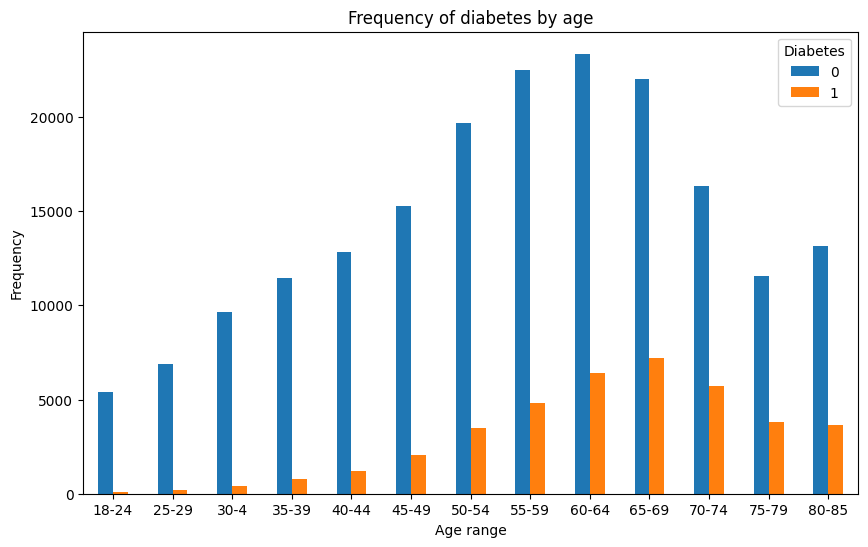

In [344]:
pd.crosstab(data1.Age,data1.Diabetes).plot(kind="bar",figsize=(10,6))
plt.title('Frequency of diabetes by age')
plt.xlabel('Age range')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

We know that as age increases, the chances of having diabetes also commonly increases. From the above we can say, the median age of diabetic people is higher than that of non-diabetic people.
Now we have this column display [Yes - NO] and its relationship with the target:

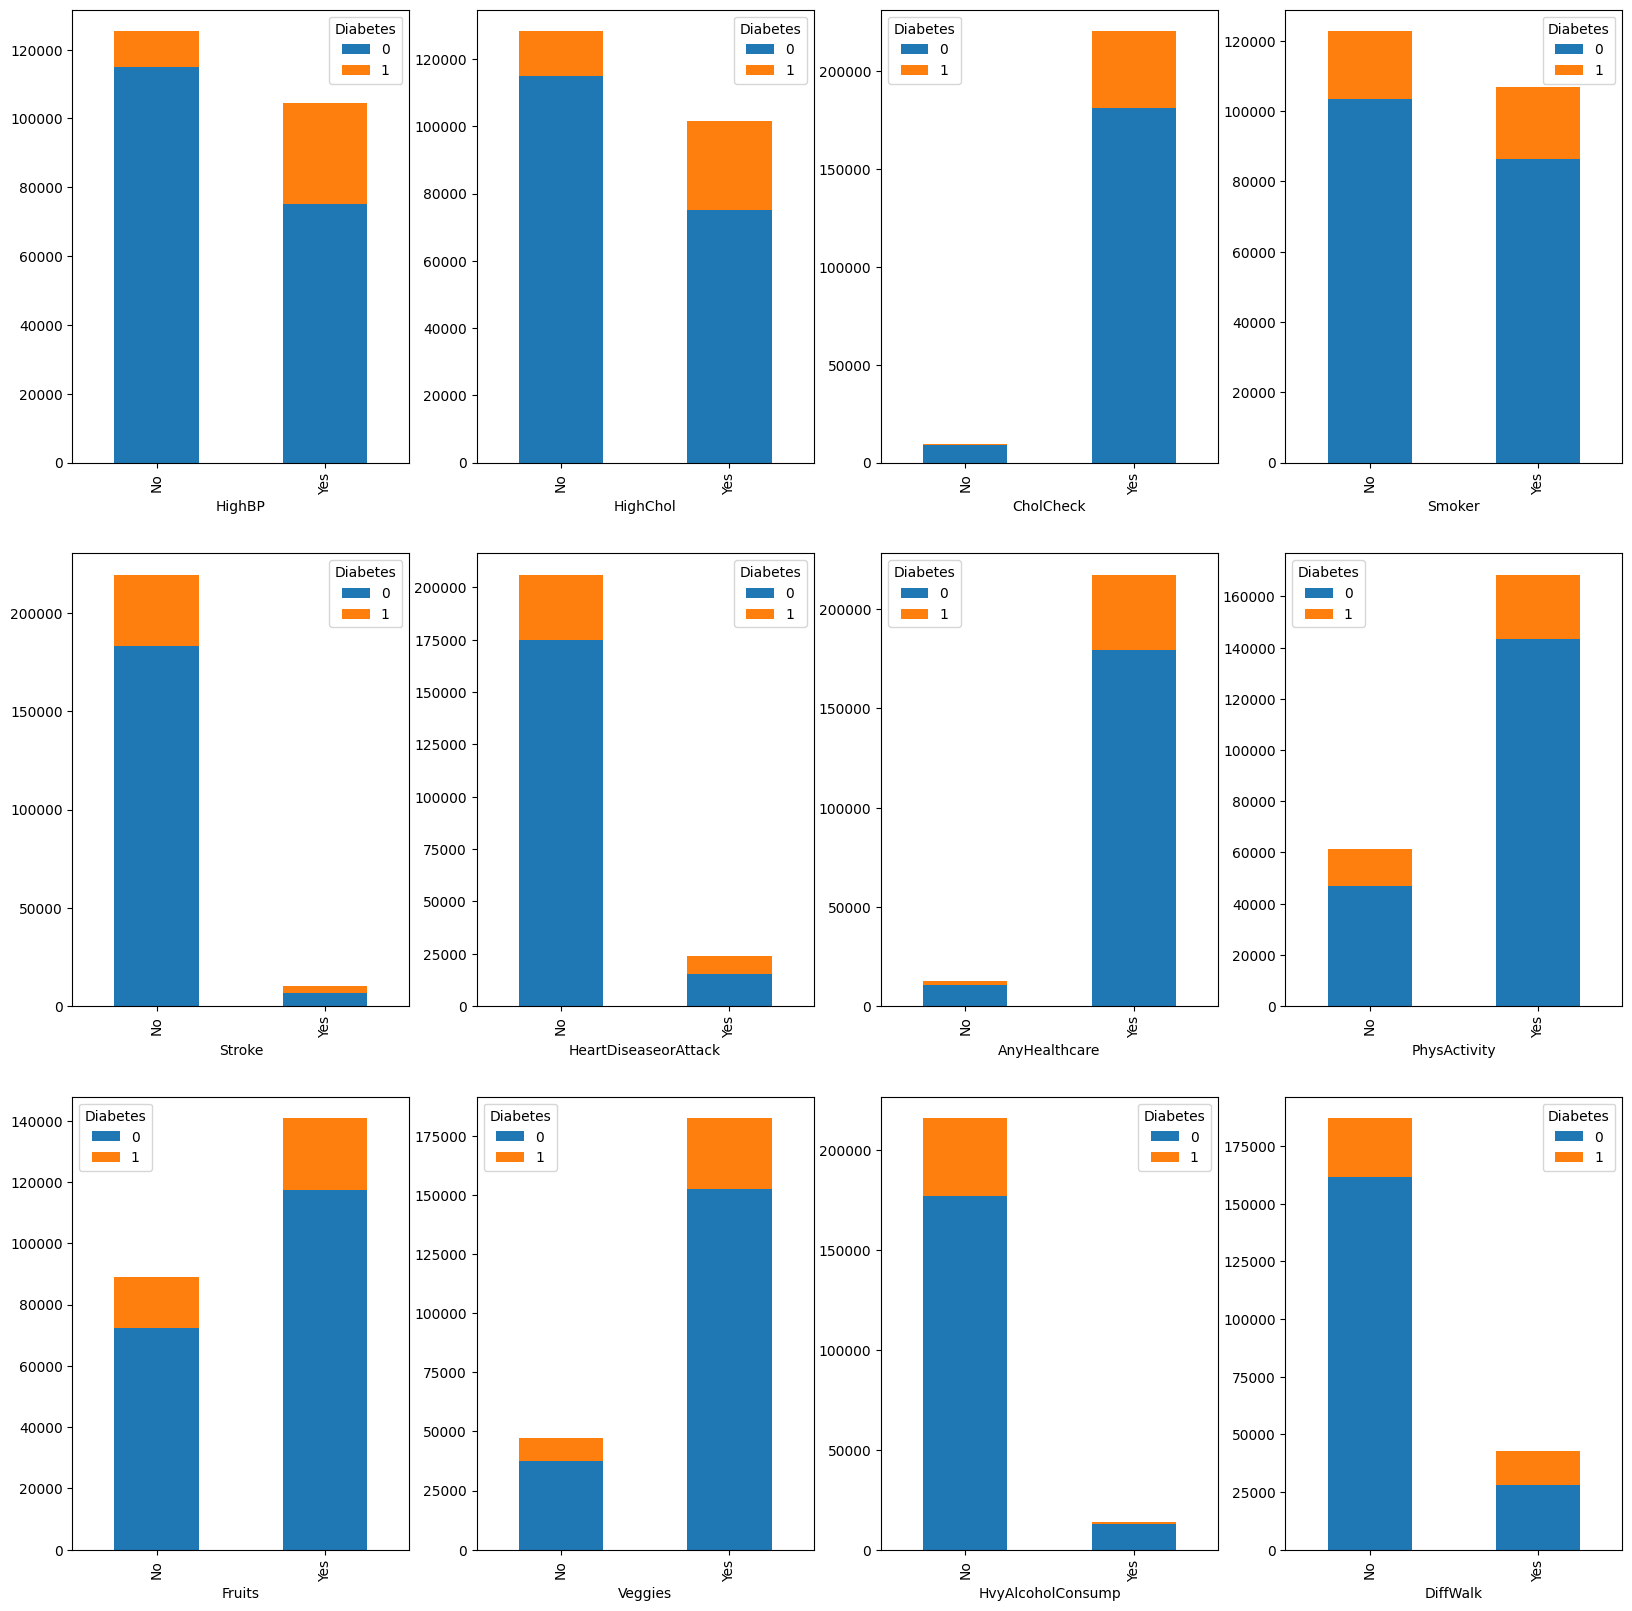

In [345]:
cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'AnyHealthcare',
        'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','DiffWalk']

def create_plot_pivot(data, x_column):
    _df_plot = data1.groupby([x_column, 'Diabetes']).size() \
    .reset_index().pivot(columns='Diabetes', index=x_column, values=0)
    return _df_plot
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

**HighBP**

In [346]:
data1.groupby(['Diabetes','HighBP'])['Diabetes'].agg(Count='count')

Count
Diabetes HighBP        
0        No      114950
         Yes      75105
1        No       10409
         Yes      29317

In [347]:
(data[data['Diabetes']==0]['HighBP'].value_counts(1).sort_index())

0    0.604825
1    0.395175
Name: HighBP, dtype: float64

In [348]:
(data[data['Diabetes']==1]['HighBP'].value_counts(1).sort_index())

0    0.26202
1    0.73798
Name: HighBP, dtype: float64

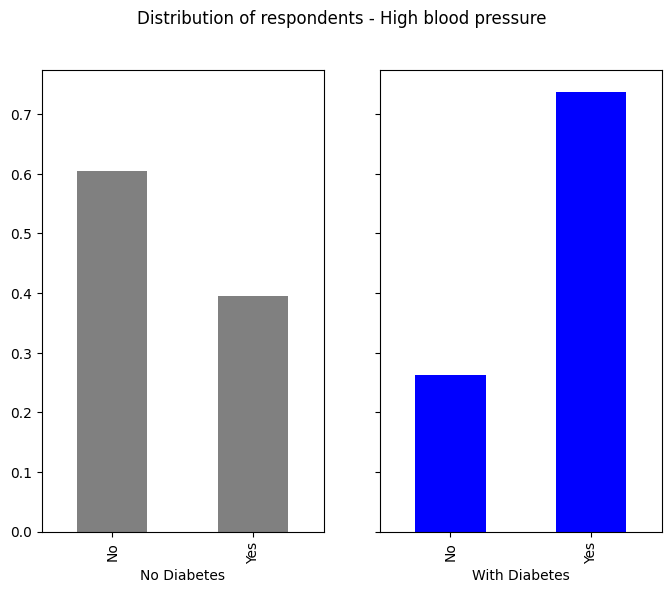

In [349]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribution of respondents - High blood pressure')
(data[data['Diabetes']==0]['HighBP'].value_counts(1).sort_index().plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('No Diabetes',size=10)
ax.set_xticklabels(["No", 'Yes'])

(data[data['Diabetes']==1]['HighBP'].value_counts(1).sort_index().plot(ax=ax2, kind='bar',color="blue"))
ax2.set_xlabel('With Diabetes',size=10)
ax2.set_xticklabels(["No", 'Yes'])
plt.show()

We observed that 73% of respondents with diabetes have high blood pressure, compared to 40% of those without diabetes.

**Cholesterol**

In [350]:
(data[data['Diabetes']==0]['HighChol'].value_counts(1).sort_index())

0    0.604651
1    0.395349
Name: HighChol, dtype: float64

In [351]:
(data[data['Diabetes']==1]['HighChol'].value_counts(1).sort_index())

0    0.336203
1    0.663797
Name: HighChol, dtype: float64

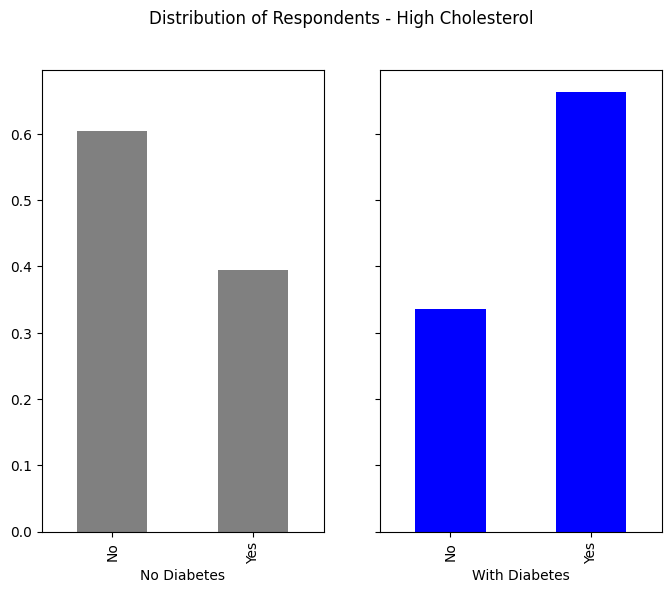

In [352]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribution of Respondents - High Cholesterol')
(data[data['Diabetes']==0]['HighChol'].value_counts(1).sort_index().plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('No Diabetes',size=10)
ax.set_xticklabels(["No", 'Yes'])

(data[data['Diabetes']==1]['HighChol'].value_counts(1).sort_index().plot(ax=ax2, kind='bar',color="blue"))
ax2.set_xlabel('With Diabetes',size=10)
ax2.set_xticklabels(["No", 'Yes'])
plt.show()

We observed that 66% of respondents with diabetes have high cholesterol, compared to 40% of those without diabetes.

**Stroke**

In [354]:
(data[data['Diabetes']==0]['Stroke'].value_counts(1).sort_index())

0    0.964479
1    0.035521
Name: Stroke, dtype: float64

In [355]:
(data[data['Diabetes']==1]['Stroke'].value_counts(1).sort_index())

0    0.911066
1    0.088934
Name: Stroke, dtype: float64

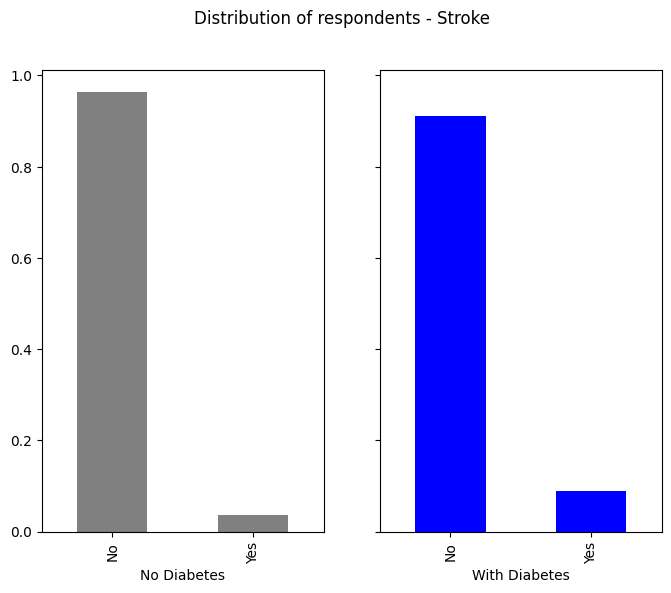

In [356]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribution of respondents - Stroke')
(data[data['Diabetes']==0]['Stroke'].value_counts(1).sort_index().plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('No Diabetes',size=10)
ax.set_xticklabels(["No", 'Yes'])

(data[data['Diabetes']==1]['Stroke'].value_counts(1).sort_index().plot(ax=ax2, kind='bar',color="blue"))
ax2.set_xlabel('With Diabetes',size=10)
ax2.set_xticklabels(["No", 'Yes'])
plt.show()

We observed that 8% of respondents with diabetes suffered a stroke, compared to 3% of those without diabetes.

**HeartDiseaseorAttack**

In [357]:
(data[data['Diabetes']==0]['HeartDiseaseorAttack'].value_counts(1).sort_index())

0    0.920039
1    0.079961
Name: HeartDiseaseorAttack, dtype: float64

In [358]:
(data[data['Diabetes']==1]['HeartDiseaseorAttack'].value_counts(1).sort_index())

0    0.785531
1    0.214469
Name: HeartDiseaseorAttack, dtype: float64

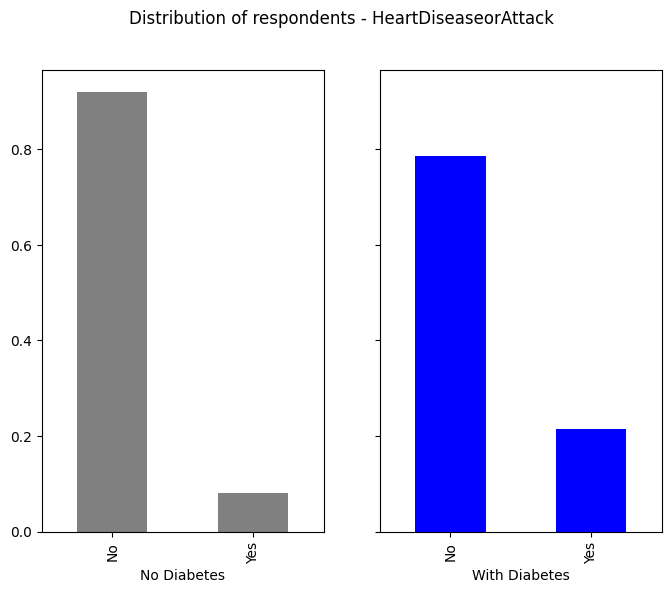

In [359]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribution of respondents - HeartDiseaseorAttack')
(data[data['Diabetes']==0]['HeartDiseaseorAttack'].value_counts(1).sort_index().plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('No Diabetes',size=10)
ax.set_xticklabels(["No", 'Yes'])

(data[data['Diabetes']==1]['HeartDiseaseorAttack'].value_counts(1).sort_index().plot(ax=ax2, kind='bar',color="blue"))
ax2.set_xlabel('With Diabetes',size=10)
ax2.set_xticklabels(["No", 'Yes'])
plt.show()

We observed that 21% of the respondents with diabetes suffered a heart attack, compared to 7% of those without diabetes.

**Income**

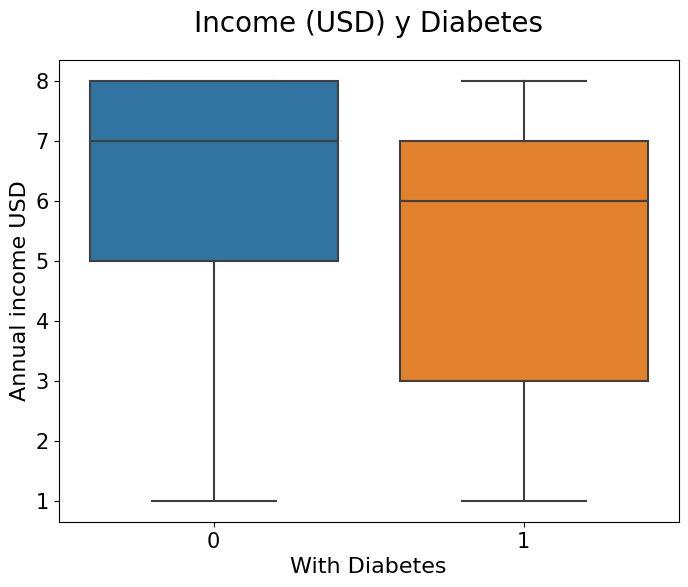

In [381]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.boxplot(x="Diabetes", y="Income" ,data=data)
bp.axes.set_title("Income (USD) y Diabetes",fontsize=20, pad=20)
bp.set_xlabel("With Diabetes",fontsize=16)
bp.set_ylabel("Annual income USD",fontsize=16)
bp.tick_params(labelsize=15)

Text(0.5, 1.0, 'Income distribution of respondents with Diabetes')

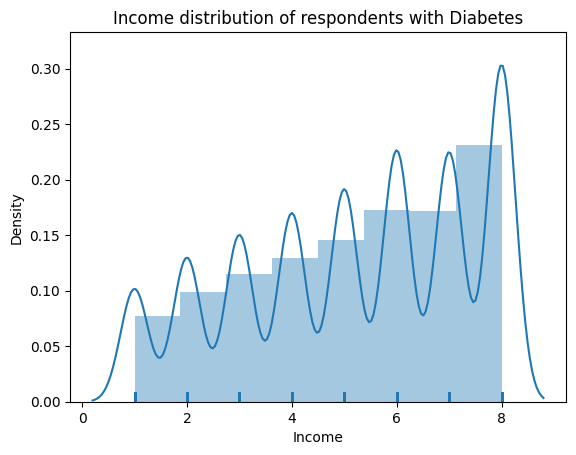

In [382]:
sns.distplot(data[data['Diabetes']==1]['Income'], hist=True, kde=True, rug=True, bins = 8)
plt.title("Income distribution of respondents with Diabetes")

Text(0.5, 1.0, 'Income distribution of respondents without Diabetes')

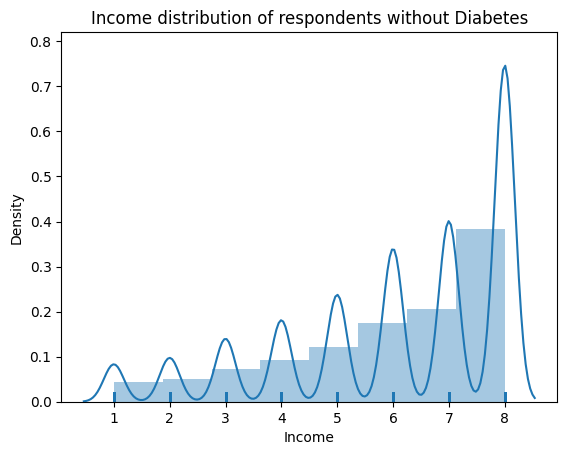

In [383]:
sns.distplot(data[data['Diabetes']==0]['Income'], hist=True, kde=True, rug=True, bins = 8)
plt.title("Income distribution of respondents without Diabetes")

The median of those with diabetes is lower than the median income of those without diabetes. 
The majority of respondents have high income levels. 
In the lower income ranges we have more respondents with diabetes.

**Sex**

In [384]:
data1.groupby(['Sex','Diabetes'])['Diabetes'].agg(Count='count')

Count
Sex   Diabetes        
Man   0          82150
      1          18777
Woman 0         107905
      1          20949

In [385]:
20949/(107905 + 20949) # mujeres

0.16257935337668988

In [386]:
18777/(82150+18777) # hombres 

0.18604535951727486

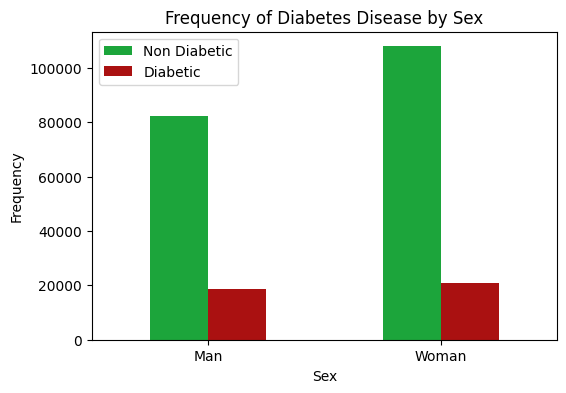

In [387]:
pd.crosstab(data1.Sex,data1.Diabetes).plot(kind="bar",figsize=(6,4),color=['#1CA53B','#AA1111' ])
plt.title('Frequency of Diabetes Disease by Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["Non Diabetic","Diabetic"])
plt.ylabel('Frequency')
plt.show()

From the graph we can see that there are more women than men with diabetes, however, there are more women than men in the study; taking the number of men with diabetes over the total number of men surveyed, the percentage is 19%; which is higher than the percentage of women with diabetes over the total number of women surveyed which is 16%.

**GenHlth**

<Axes: xlabel='GenHlth', ylabel='Count'>

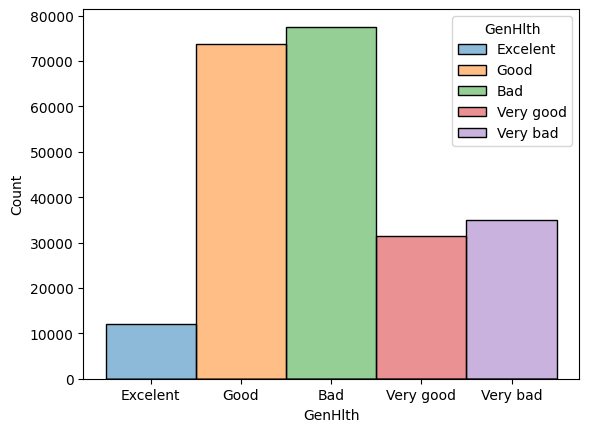

In [388]:
sns.histplot(data=data1, x="GenHlth", hue="GenHlth")

**PhysHlth**

Text(0.5, 1.0, 'Histogram of physical activity frequency')

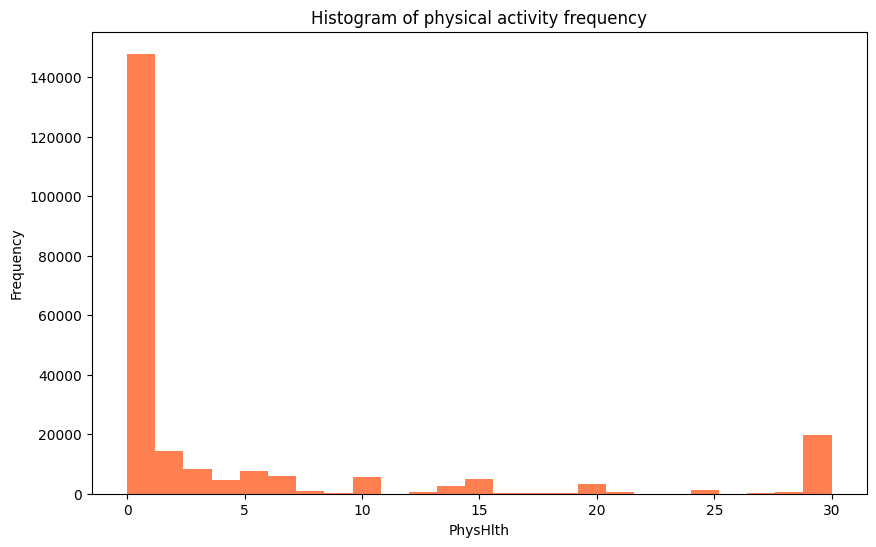

In [389]:

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= data.PhysHlth, bins=25, density=False, orientation='vertical', color = 'coral')
ax.set_xlabel('PhysHlth')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of physical activity frequency')

**MentHlth**

Text(0.5, 1.0, 'Histogram of mental health days')

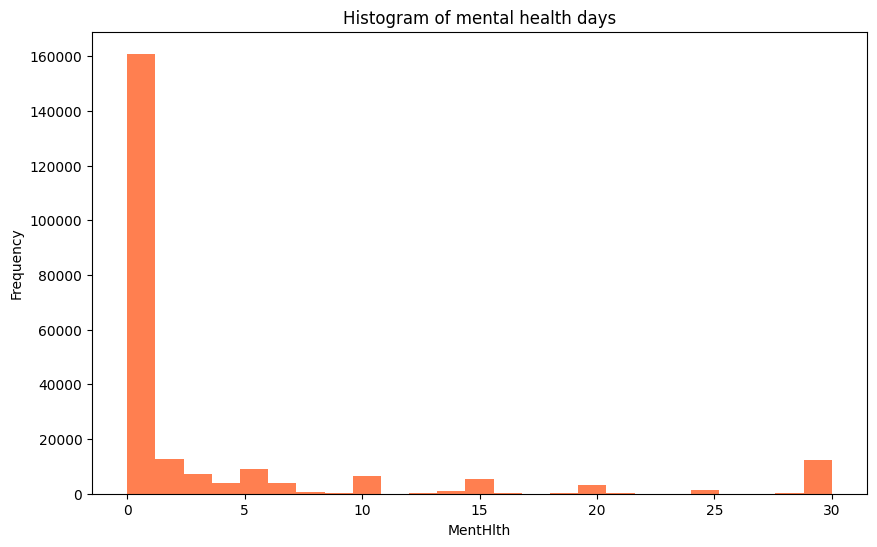

In [390]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= data.MentHlth, bins=25, density=False, orientation='vertical', color = 'coral')
ax.set_xlabel('MentHlth')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of mental health days')

Looking at the histogram of mental and physical health days, more than one hundred thousand respondents answered that in the last 30 days, at most, one day they were sick or injured, or depressed or under stress.
We can conclude that there is a relationship between physical and mental health, considering that one affects/influences the other.

## Algorithm selection: 

What do we want to achieve with the model: classify data into two classes: Diabetic and non-diabetic.

What data do we have to solve the problem? Labeled data.

Conclusion: supervised learning algorithm, classification.

In the evaluations of our models we will pay special attention to the sensitivity (recall), since, in the health area we say that the sensitivity (recall) is the ability to correctly detect the disease among the sick, in cases where losing a positive case has a much higher cost than misclassifying a case as positive.
On the other hand, we will also pay attention to false negatives, type II error, since, for this case, it means classifying a patient with diabetes as not having the disease. 

Our goal is to obtain a minimum recall of 75%.

## Separate target variables

In [391]:
X = data.drop('Diabetes', 1)
y = data['Diabetes']

## Feature Selection

In [392]:
from sklearn.feature_selection import SelectKBest

In [393]:
selector = SelectKBest(k=16)

In [394]:
selector.fit(X,y)

SelectKBest(k=16)

Text(0.5, 1.0, 'Importance of each feature')

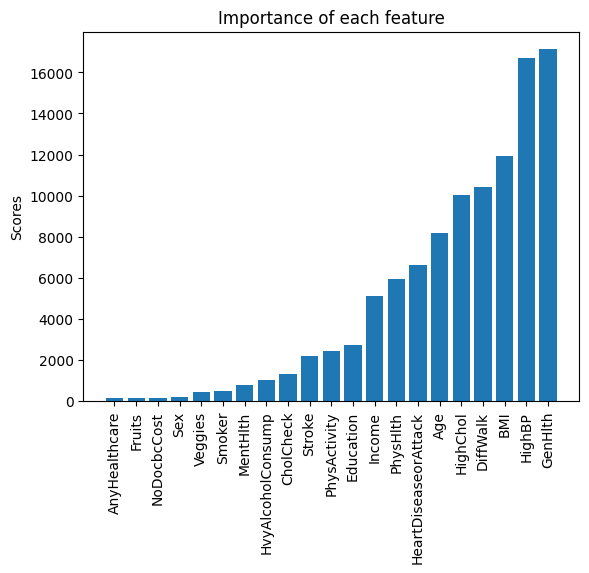

In [395]:
scores = selector.scores_

sorted_indices = np.argsort(scores)

plt.bar(np.arange(len(X.columns)), scores[sorted_indices])
plt.xticks(np.arange(len(X.columns)), X.columns[sorted_indices], rotation=90)
plt.ylabel('Scores')
plt.title('Importance of each feature')

In [396]:
mask = selector.get_support()

selected_features = X.columns[mask]

print("Selected features:", selected_features)

Selected features: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


The variables selected are consistent with the exploratory data analysis.

## I remove attributes according to selection

In [397]:
cols_to_drop = data[['Fruits','Veggies', 'AnyHealthcare', 'NoDocbcCost', 'Sex']]

In [398]:
X1 = X.drop(cols_to_drop, axis=1) 

In [399]:
X1.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')

## Class balancing

In [400]:
print(X1.shape, y.shape)

(229781, 16) (229781,)


In [401]:
y.value_counts()

0    190055
1     39726
Name: Diabetes, dtype: int64

The dataset is unbalanced, we need to balance it to get a better model, since predicting that a respondent is not diabetic is more likely than predicting that he is diabetic. 

We are going to balance them by discarding the majority class before applying a ML algorithm.
We use Near-Miss from the 'imblearn' library.

In [402]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1)

X_sm,y_sm = nm.fit_resample(X1,y)


<Axes: title={'center': 'Label distribution after subsampling'}>

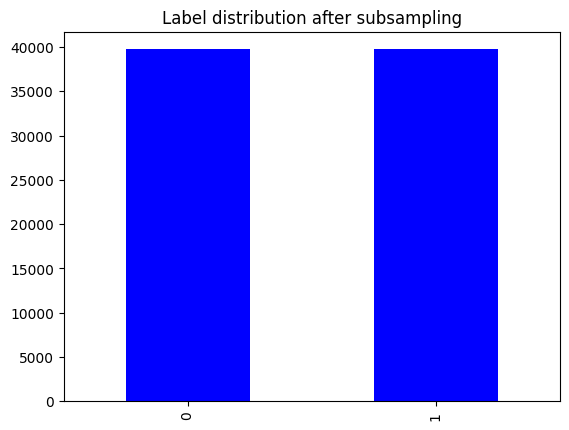

In [403]:
y_sm.value_counts().plot(kind='bar', title='Label distribution after subsampling', color = 'blue')

## Division of datasets into train and test

In [404]:
X_train , X_test , y_train , y_test = train_test_split(X_sm,y_sm, test_size=0.2 , random_state=42)

In [405]:
print("Examples used for training: ", len(X_train))
print("Examples used for test: ", len(X_test))

Examples used for training:  63561
Examples used for test:  15891


## Data Scalling 

Standardizing a data set involves rescaling the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1.

Scaling the features is of utmost importance because different features are on different scales.

In [406]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Building

We will train 4 algorithms that use Assembly Methods:
- LightGBM
- Random Forest
- XgBoost
- Gradient Boosting 

**HyperParameter Tuning**

## LGBMClassifier

One approach to balance the accuracy of GridSearchCV with the speed of RandomizedSearchCV is to use a combination of both methods.

We can start by using RandomizedSearchCV to sample a large number of hyperparameters from the specified distributions. This can help us to quickly explore the search space and identify regions that are most promising. Once we identify a promising region, we use GridSearchCV to perform a more targeted search in that region, using a smaller range of hyperparameter values.

By combining the two methods, we leverage the speed of RandomizedSearchCV to quickly explore the search space, while relying on the precision of GridSearchCV to perform a more focused search in promising regions.

In [407]:
# Apply hyperparameter tuning of the model:
LG = lgb.LGBMClassifier(random_state = 42)

param_dist_LG = {
    'num_leaves': sp_randint(6, 50),
    'max_depth': sp_randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Define Randomized search
LG_RS = RandomizedSearchCV(
    estimator  = LG,
    param_distributions = param_dist_LG,
    scoring    = 'recall', 
    cv         = 5, 
    return_train_score = True,
    n_jobs  = -1,
    n_iter=50
)

In [408]:
# Train
lg_RS_result = LG_RS.fit(X_train, y_train)

# Sumarize results
print("Best: %f using %s" % (lg_RS_result.best_score_, lg_RS_result.best_params_))

[LightGBM] [Info] Number of positive: 31725, number of negative: 31836
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 63561, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499127 -> initscore=-0.003493
[LightGBM] [Info] Start training from score -0.003493
Best: 0.778566 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'num_leaves': 15, 'reg_alpha': 0, 'reg_lambda': 0}


In [409]:
# Obtain the best hyperparameters from randomized search
best_params_LG = lg_RS_result.best_params_

In [410]:
best_params_LG 

{'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 300,
 'num_leaves': 15,
 'reg_alpha': 0,
 'reg_lambda': 0}

In [411]:
# Define Grid search
params_LG = {'n_estimators': [best_params_LG['n_estimators'] - 50, best_params_LG['n_estimators'], best_params_LG['n_estimators'] + 50,
                            best_params_LG['n_estimators'] + 25,best_params_LG['n_estimators'] -25],
       'max_depth': [best_params_LG['max_depth'] - 1, best_params_LG['max_depth'], best_params_LG['max_depth'] + 1],
       'num_leaves': [best_params_LG['num_leaves'] - 1, best_params_LG['num_leaves'], best_params_LG['num_leaves'] + 1],
       'reg_alpha': [best_params_LG['reg_alpha'] - 0.1, best_params_LG['reg_alpha'], best_params_LG['reg_alpha'] + 0.1],
       'reg_lambda': [best_params_LG['reg_lambda'] - 0.1, best_params_LG['reg_lambda'], best_params_LG['reg_lambda'] + 0.1],
       'learning_rate': [best_params_LG['learning_rate'] - 0.1, best_params_LG['learning_rate'], best_params_LG['learning_rate'] + 0.1]
}

LG_GS = GridSearchCV(    
       estimator  = LG,
       param_grid = params_LG,
       scoring    = 'recall', 
       cv         = 5, 
       return_train_score = True,
       n_jobs  = -1
       )

In [412]:
# Train
LG_GS_result = LG_GS.fit(X_train, y_train)
# Sumarize results
print("Best: %f using %s" % (LG_GS_result.best_score_, LG_GS_result.best_params_))

[LightGBM] [Info] Number of positive: 31725, number of negative: 31836
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 63561, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499127 -> initscore=-0.003493
[LightGBM] [Info] Start training from score -0.003493
Best: 0.780299 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 250, 'num_leaves': 14, 'reg_alpha': 0, 'reg_lambda': 0.1}


In [413]:
# We apply the obtained parameters
LG1 = lgb.LGBMClassifier(
    n_jobs  = -1,
    random_state = 42,
    learning_rate =  0.1,
    max_depth= 6,
    n_estimators= 300,
    num_leaves = 11,
    reg_alpha= 0,
    reg_lambda= 0.5
)

# Train
LG1.fit(X_train, y_train)

# Obtain the predictions for the test data set
y_est2 = LG1.predict(X_test) 

# Obtain the predictions for the train data set.
y_est5 = LG1.predict(X_train) 

[LightGBM] [Info] Number of positive: 31725, number of negative: 31836
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 63561, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499127 -> initscore=-0.003493
[LightGBM] [Info] Start training from score -0.003493


In [414]:
# Obtain metrics
accuracy_LG_test = accuracy_score(y_test,y_est2)
recall_LG_test = recall_score(y_test, y_est2)
precision_LG_test= precision_score(y_test, y_est2)
f1_LG_test = f1_score(y_test, y_est2)
Roc_auc_test_LG = roc_auc_score(y_test, y_est2)

MSE_LG_train = mean_squared_error(y_train, y_est5)
accuracy_LG_train = accuracy_score(y_train,y_est5)
recall_LG_train = recall_score(y_train, y_est5)
precision_LG_train =  precision_score(y_train, y_est5)
f1_LG_train = f1_score(y_train, y_est5)
Roc_auc_train_LG =  roc_auc_score(y_train, y_est5)

In [484]:
# Show the metrics
vals1 = data=["Model 1: LGBMClassifier", accuracy_LG_train,accuracy_LG_test, precision_LG_train,precision_LG_test,
            recall_LG_train,recall_LG_test,f1_LG_train,f1_LG_test, Roc_auc_train_LG , Roc_auc_test_LG ] 
cols1 = ["Model", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
        "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_LG = pd.DataFrame([vals1], columns=cols1)

In [485]:
round(df_metrics_LG,3) 

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Model 1: LGBMClassifier,0.855,0.849,0.915,0.914,0.783,0.773,0.844,0.838,0.855,0.85


LGBMClassifier confusion matrix


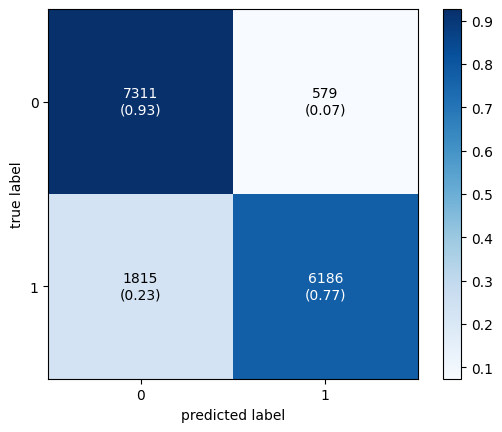

In [486]:
print('LGBMClassifier confusion matrix')

cm1 = confusion_matrix(y_test,y_est2)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 93% of the cases predicted that the respondent does not have diabetes and he/she does (True Negative).
- 23% of the cases predicted that the respondent does not have diabetes and he does (False Negative).
- 7% of cases predicted that the respondent has diabetes and they do not.(False Positive)
- 77% of cases that the respondent has diabetes correctly predicted that they have the disease.(True Positive)

In [418]:
def plot_roc_curve(fpr, tpr, roc_auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curve')
    plt.legend()
    plt.show()

AUC:  0.8498846627061352


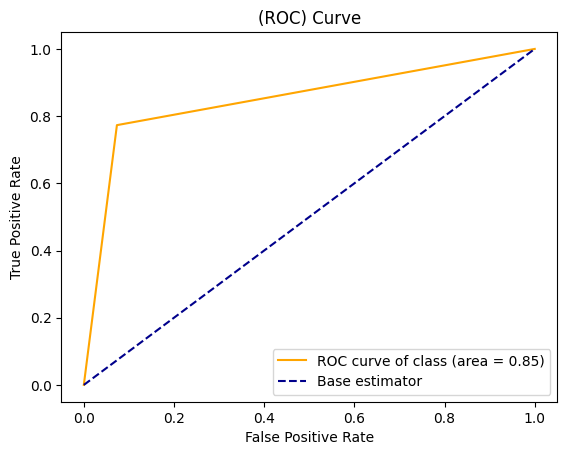

In [419]:
fpr, tpr, thresholds = roc_curve(y_test, y_est2)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

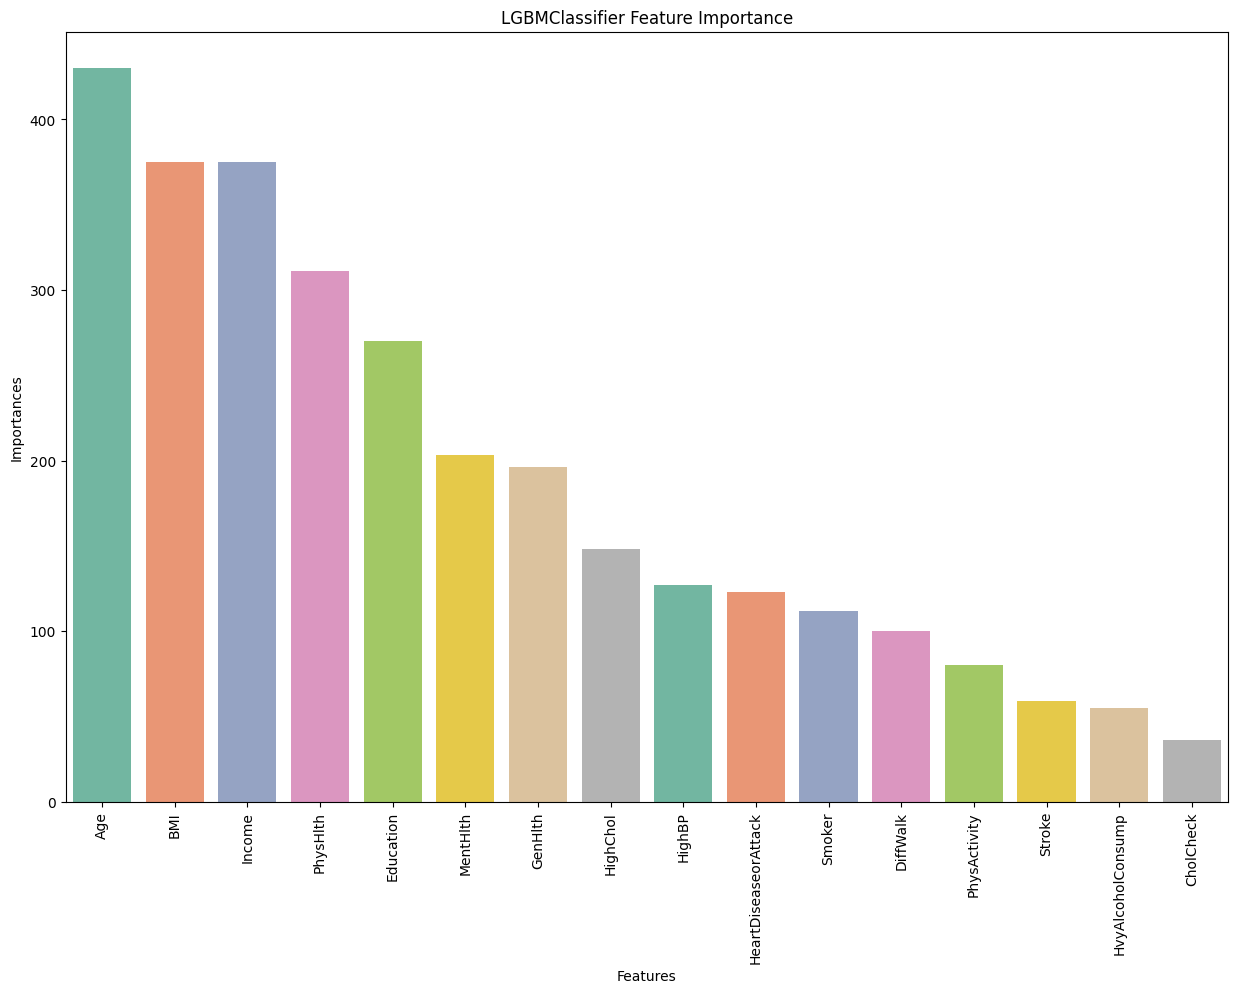

In [420]:
importances_LG = LG1.feature_importances_
columns = X1.columns
df_LG = pd.DataFrame({'Features': columns, 'Importances': importances_LG})
df_LG = df_LG.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_LG, palette='Set2')
plt.title('LGBMClassifier Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [510]:
joblib.dump(LG1, 'diabetes_LG_model.joblib')

['diabetes_LG_model.joblib']

## Random Forest Classifier

In [422]:
# I apply hyperparameter tuning of the model
RF = RandomForestClassifier(random_state = 42)

# Define Randomized search
param_distributions_RF = { 
    
    'n_estimators' :[50, 75, 100, 125, 150,200,250], 
    'max_features': [ 'sqrt', 'log2'], 
    'max_depth' : [1,2,3,4,5,None],
    'criterion' :['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.02,0.03],
    'min_samples_split':[2,3,4,5,6,7]
    
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_RS = RandomizedSearchCV(
    estimator  = RF,
    param_distributions = param_distributions_RF,
    scoring    = 'recall', 
    cv         = cv, 
    return_train_score = True,
    n_jobs  = -1,
    n_iter=50
)

In [423]:
# Train
RF_RS_result = RF_RS.fit(X_train, y_train)
# Sumarize results
print("Best: %f using %s" % (RF_RS_result.best_score_, RF_RS_result.best_params_))

Best: 0.785185 using {'n_estimators': 150, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'ccp_alpha': 0.0}


In [424]:
# Obtain the best hyperparameters from randomized search
best_params_RF = RF_RS_result.best_params_

In [425]:
best_params_RF

{'n_estimators': 150,
 'min_samples_split': 4,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'gini',
 'ccp_alpha': 0.0}

In [426]:
# Define Grid search
params_RF = {'n_estimators': [best_params_RF['n_estimators'] - 50, best_params_RF['n_estimators'], best_params_RF['n_estimators'] + 50,
       best_params_RF['n_estimators'] + 25,best_params_RF['n_estimators'] -25],
       'min_samples_split': [best_params_RF['min_samples_split'] - 1, best_params_RF['min_samples_split'], best_params_RF['min_samples_split'] + 1],
       'ccp_alpha': [best_params_RF['ccp_alpha'] - 0.1, best_params_RF['ccp_alpha'], best_params_RF['ccp_alpha'] + 0.1]
}

RF_GS = GridSearchCV(    
       estimator  = RF,
       param_grid = params_RF,
       scoring    = 'recall', 
       cv         = 5, 
       return_train_score = True,
       n_jobs  = -1
)

In [427]:
# Train
RF_GS_result = RF_GS.fit(X_train, y_train)
# Sumarize results
print("Best: %f using %s" % (RF_GS_result.best_score_, RF_GS_result.best_params_))

Best: 0.784681 using {'ccp_alpha': 0.0, 'min_samples_split': 3, 'n_estimators': 150}


In [428]:
# We apply the parameters obtained
RF1 = RandomForestClassifier(
    n_jobs  = -1,
    random_state = 42, 
    n_estimators = 150,
    min_samples_split = 3 ,
    max_features =  'log2',
    max_depth =  None,
    criterion = 'gini',
    ccp_alpha = 0.01
)

# Train
RF1.fit(X_train, y_train)

# Obtain the predictions for the test data set
y_est4 = RF1.predict(X_test) 

# Obtain the predictions for the train data set.
y_est6 = RF1.predict(X_train) 

In [429]:
# Obtain the metrics
accuracy_RF_test = accuracy_score(y_test,y_est4)
recall_RF_test = recall_score(y_test, y_est4)
precision_RF_test= precision_score(y_test, y_est4)
f1_RF_test = f1_score(y_test, y_est4)
Roc_auc_test_RF = roc_auc_score(y_test, y_est4)

MSE_RF_train = mean_squared_error(y_train, y_est6)
accuracy_RF_train = accuracy_score(y_train,y_est6)
recall_RF_train = recall_score(y_train, y_est6)
precision_RF_train =  precision_score(y_train, y_est6)
f1_RF_train = f1_score(y_train, y_est6)
Roc_auc_train_RF =  roc_auc_score(y_train, y_est6)

In [487]:
# Show the metrics
vals2 = data=["Model 2: Random Forest ", accuracy_RF_train,accuracy_RF_test, precision_RF_train,precision_RF_test,
            recall_RF_train,recall_RF_test,f1_RF_train,f1_RF_test, Roc_auc_train_RF , Roc_auc_test_RF ] 
cols2 = ["Model", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
        "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_RF = pd.DataFrame([vals2], columns=cols2)

In [488]:
round(df_metrics_RF,3) 

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Model 2: Random Forest,0.812,0.804,0.877,0.875,0.725,0.713,0.794,0.786,0.812,0.805


Random Forest confusion matrix


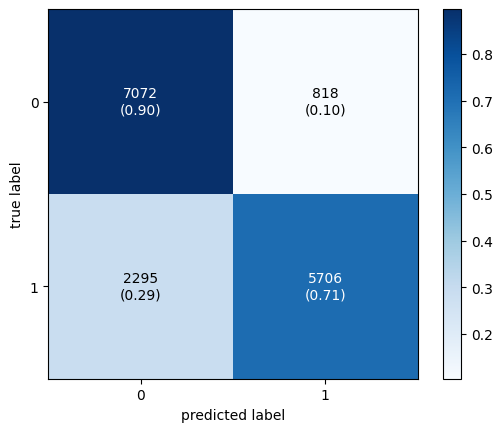

In [432]:
print('Random Forest confusion matrix')

cm1 = confusion_matrix(y_test,y_est4)
plot_confusion_matrix(conf_mat=cm1,
                    show_absolute=True,
                    show_normed=True,
                    colorbar=True)
plt.show()

- 90% of the cases predicted that the respondent does not have diabetes and he/she does (True Negative).
- 29% of cases predicted that the respondent does not have diabetes and he does (False Negative).
- 10% of cases predicted that the respondent has diabetes and they do not.(False Positive)
- 71% of cases that the respondent has diabetes correctly predicted that they have the disease.(True Positive)

AUC:  0.8047426581183056


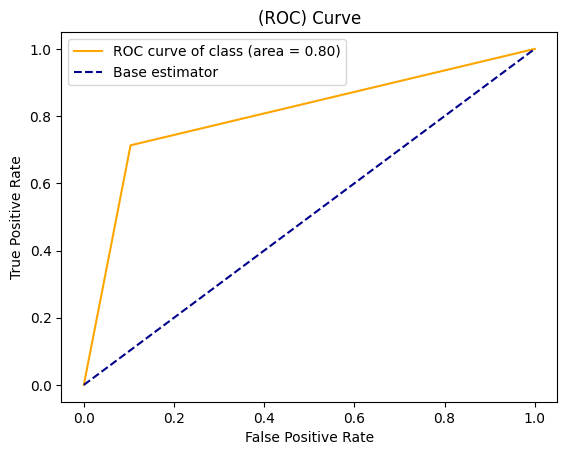

In [433]:
fpr, tpr, thresholds = roc_curve(y_test, y_est4)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

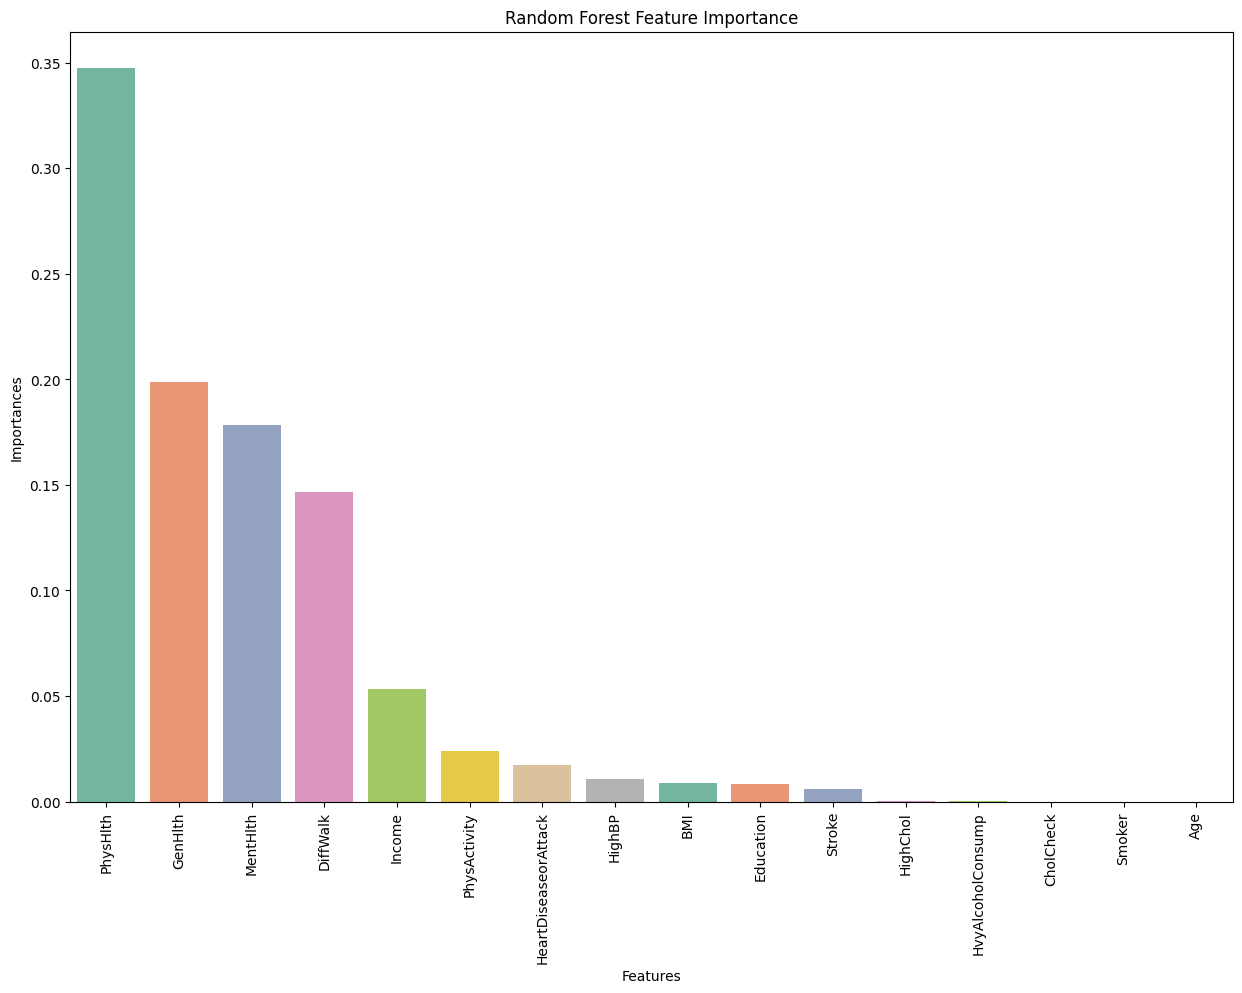

In [489]:
importances_RF = RF1.feature_importances_
columns = X1.columns

df_RF = pd.DataFrame({'Features': columns, 'Importances': importances_RF})
df_RF = df_RF.sort_values(by='Importances', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_RF, palette='Set2')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [509]:
joblib.dump(RF1, 'diabetes_RF_model.joblib')

['diabetes_RF_model.joblib']

# XGBOOST

**Bayesian Optimization with HYPEROPT**

We will use Bayesian Optimization with HYPEROPT to evaluate its results on the Xgboost algorithm.

Hyperopt is a Python library used to fit the hyperparameters of the model, which searches through a space of hyperparameter values and finds the best possible values that produce the minimum of the loss function.

Source:
https://github.com/hyperopt/hyperopt/tree/master

In [437]:
# Initialize domain space for range of values, 
# The domain space is the input values over which we want to search.
space={ 
        'n_estimators': 180,
        'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'eta': hp.quniform('eta', 0.05, 1, 0.025),
        'seed': 42
    }

In [438]:
# Define objective function:
def objective(space):
        clf=xgb.XGBClassifier(objective = 'binary:logistic', 
                n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                reg_lambda = space['reg_lambda'],min_child_weight=int(space['min_child_weight']),
                colsample_bytree=space['colsample_bytree'],eta = space['eta'])
                
        evaluation = [( X_test, y_test)]

        clf.fit(X_train, y_train,
        eval_set=evaluation, eval_metric="auc",
        early_stopping_rounds=10,verbose=False)


        y_pred = clf.predict(X_test)
        recall = recall_score(y_test, y_pred)
        print ("SCORE:", recall)
        return {'loss': -recall, 'status': STATUS_OK }

In [439]:
trials = Trials()
best = fmin(fn=objective,space=space, max_evals=100, algo=tpe.suggest,trials = trials)
print(best)


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

SCORE:                                                 
0.7657792775903012                                     
SCORE:                                                                            
0.7684039495063117                                                                
SCORE:                                                                            
0.770153730783652                                                                 
SCORE:                                                                            
0.770153730783652                                                                
SCORE:                                                                           
0.7672790901137357                                                               
SCORE:                                                                           
0.7682789651293588                                                               
SCORE:                                                         

In [440]:
# TRAINING WITH THE BEST HYPERPARAMETERS
model_xgb = xgb.XGBClassifier(seed = 42, objective = 'binary:logistic', eval_metric =  'auc', 
                    n_estimators = 180, max_depth = 3, gamma = 7,
                    reg_lambda = 0.16,min_child_weight=1 ,
                    colsample_bytree = 0.6,eta = 1)

# Train
model_xgb.fit(X_train, y_train)

# Obtain the predictions for the test data set
y_est8 = model_xgb.predict(X_test)

# Obtain the predictions for the train data set.
y_est9 = model_xgb.predict(X_train) 

In [441]:
# Obtain the metrics
accuracy_XG1_test = accuracy_score(y_test,y_est8)
recall_XG1_test = recall_score(y_test, y_est8)
precision_XG1_test= precision_score(y_test, y_est8)
f1_XG1_test = f1_score(y_test, y_est8)
Roc_auc_test_XG1 = roc_auc_score(y_test, y_est8)      

MSE_XG1_train = mean_squared_error(y_train, y_est9)
accuracy_XG1_train = accuracy_score(y_train,y_est9)
recall_XG1_train = recall_score(y_train, y_est9)
precision_XG1_train =  precision_score(y_train, y_est9)
f1_XG1_train = f1_score(y_train, y_est9)
Roc_auc_train_XG1 =  roc_auc_score(y_train, y_est9)

In [491]:
# Show the metrics
vals4 = data=["Model 3: XGBOOST - HYPEROPT ", accuracy_XG1_train,accuracy_XG1_test, precision_XG1_train,precision_XG1_test,
            recall_XG1_train,recall_XG1_test,f1_XG1_train,f1_XG1_test, Roc_auc_train_XG1 , Roc_auc_test_XG1 ] 
cols4 = ["Model", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
        "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_GB_HYPEROPT = pd.DataFrame([vals4], columns=cols4)

In [492]:
round(df_metrics_GB_HYPEROPT,3)  

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Model 3: XGBOOST - HYPEROPT,0.853,0.847,0.914,0.915,0.779,0.767,0.841,0.835,0.853,0.847


XGBOOST confusion matrix - HYPEROPT


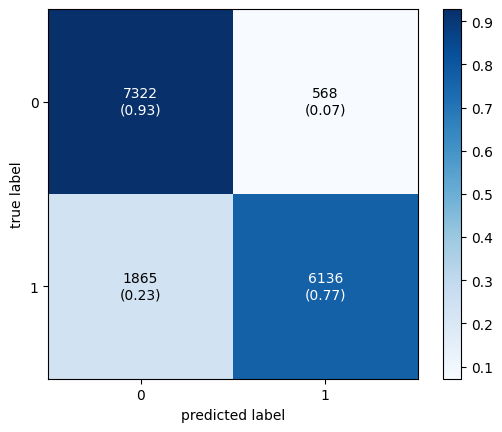

In [493]:
print('XGBOOST confusion matrix - HYPEROPT')

cm1 = confusion_matrix(y_test,y_est8)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 92% of cases predicted that the respondent does not have diabetes and it is true (True Negative).
- 23% of the cases predicted that the respondent does not have diabetes and he does (False Negative).
- 8% of cases predicted that the respondent has diabetes and they do not.(False Positive)
- 77% of cases that the respondent has diabetes correctly predicted that they have the disease.(True Positive)

AUC:  0.8474571381999304


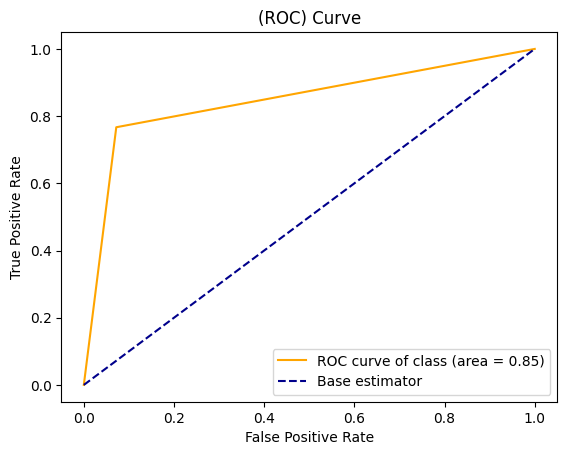

In [494]:
fpr, tpr, thresholds = roc_curve(y_test,y_est8 )
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

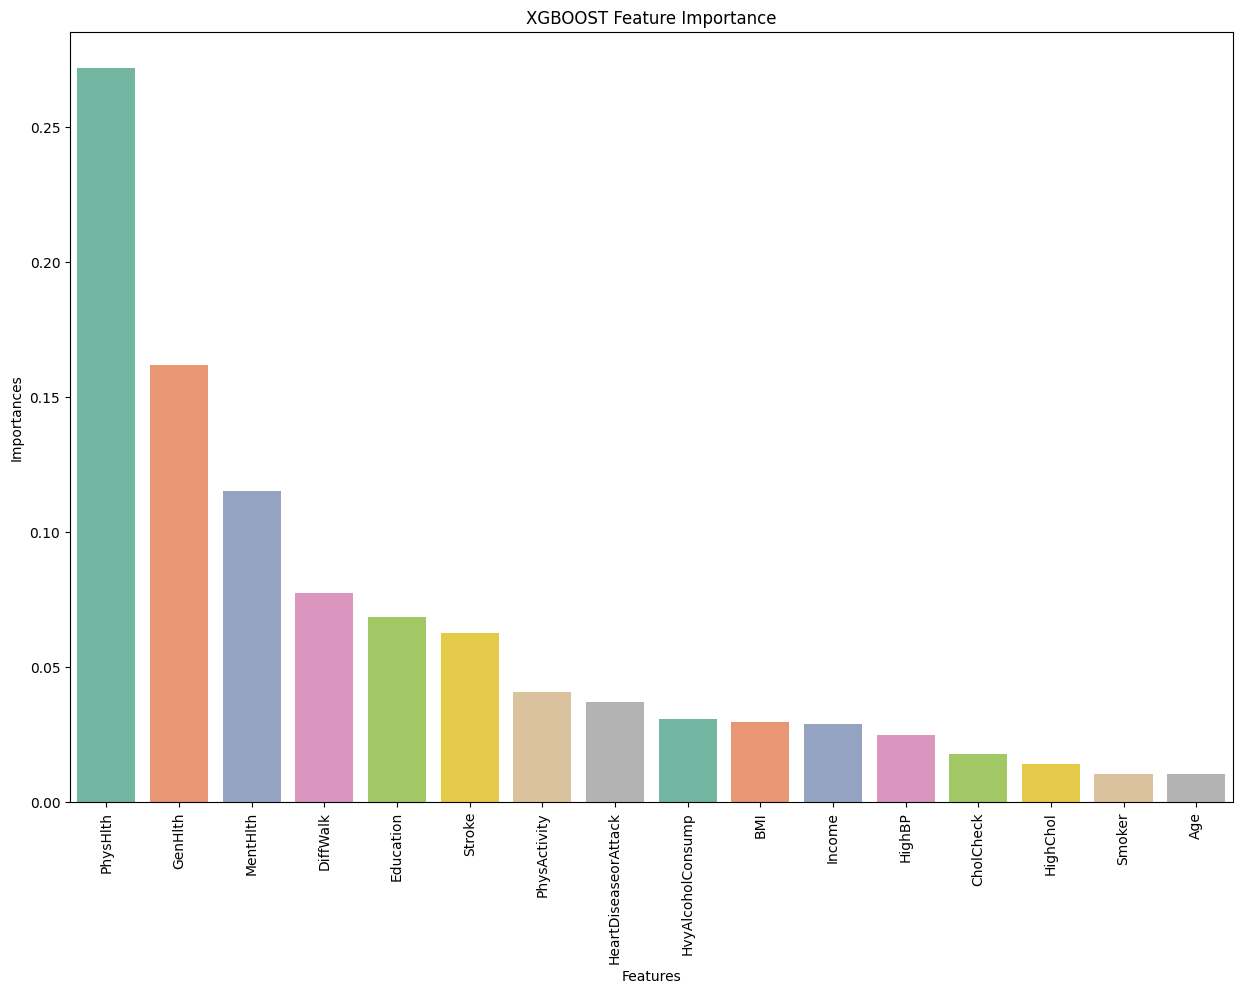

In [495]:
importances_XG = model_xgb.feature_importances_
columns = X1.columns
df_XG = pd.DataFrame({'Features': columns, 'Importances': importances_XG})
df_XG = df_XG.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_XG, palette='Set2')
plt.title('XGBOOST Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [508]:
joblib.dump(model_xgb, 'diabetes_XG_model.joblib')

['diabetes_XG_model.joblib']

## GradientBoosting

In [448]:
# scikit-optimize (skopt) library
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize
from skopt.utils import use_named_args


**gp_minimize** is a powerful function provided by the scikit-optimize library that allows us to efficiently optimize the hyperparameters of machine learning models by Bayesian optimization with Gaussian processes to minimize an objective function. It helps us find the best set of hyperparameters for our model while minimizing the number of evaluations needed, which can save a significant amount of time and resources.

In [449]:
gra = GradientBoostingClassifier(random_state = 42)

In [450]:
# list of hyperparameters to be optimized
space  = [Integer(1, 5, name='max_depth'),
        Real(0.01, 1.0, "log-uniform", name='learning_rate'),
        Integer(2, 100, name='n_estimators'),
        Integer(2, 100, name='min_samples_split'),
        Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    gra.set_params(**params)

    return -np.mean(cross_val_score(gra, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="recall"))

In [451]:
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=-0.7837'

In [452]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- n_estimators=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best parameters:
- max_depth=3
- learning_rate=0.268562
- n_estimators=100
- min_samples_split=100
- min_samples_leaf=1


In [453]:
# We apply the parameters obtained
GB1 = GradientBoostingClassifier(
    random_state = 42, 
    max_depth=3, 
    n_estimators = 80, 
    min_samples_split = 100,
    min_samples_leaf=100,
    learning_rate=0.29
)

# Train
GB1.fit(X_train, y_train)

# Obtain the predictions for the test data set
y_est1 = GB1.predict(X_test) 

# Obtain the predictions for the train data set.
y_est3 = GB1.predict(X_train) 

In [454]:
# Obtain the metrics
accuracy_GB1_test = accuracy_score(y_test,y_est1)
recall_GB1_test = recall_score(y_test, y_est1)
precision_GB1_test= precision_score(y_test, y_est1)
f1_GB1_test = f1_score(y_test, y_est1)
Roc_auc_test_GB1 = roc_auc_score(y_test, y_est1)      

MSE_GB1_train = mean_squared_error(y_train, y_est3)
accuracy_GB1_train = accuracy_score(y_train,y_est3)
recall_GB1_train = recall_score(y_train, y_est3)
precision_GB1_train =  precision_score(y_train, y_est3)
f1_GB1_train = f1_score(y_train, y_est3)
Roc_auc_train_GB1 =  roc_auc_score(y_train, y_est3)

In [497]:
# Show the metrics
vals5 = data=["Model 4: GradientBoosting ", accuracy_GB1_train,accuracy_GB1_test, precision_GB1_train,precision_GB1_test,
            recall_GB1_train,recall_GB1_test,f1_GB1_train,f1_GB1_test, Roc_auc_train_GB1 , Roc_auc_test_GB1 ] 
cols5 = ["Model", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
        "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_GraB = pd.DataFrame([vals5], columns=cols5)

In [498]:
round(df_metrics_GraB,3)  

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Model 4: GradientBoosting,0.851,0.845,0.903,0.903,0.785,0.775,0.84,0.834,0.851,0.845


GradientBoosting confusion matrix


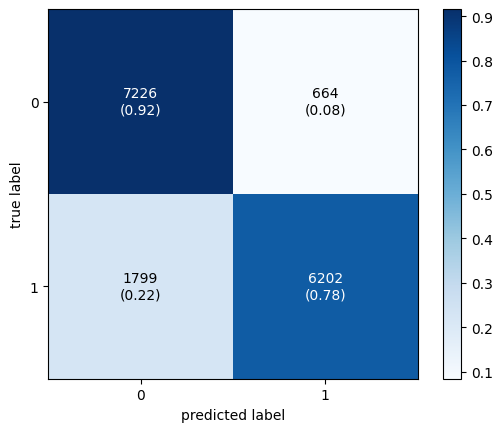

In [499]:
print('GradientBoosting confusion matrix')

cm1 = confusion_matrix(y_test,y_est1)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 92% of cases predicted that the respondent does not have diabetes and it is true (True Negative).
- 23% of the cases predicted that the respondent does not have diabetes and he does (False Negative).
- 8% of cases predicted that the respondent has diabetes and they do not.(False Positive)
- 77% of cases that the respondent has diabetes correctly predicted that they have the disease.(True Positive)

AUC:  0.8454979724492613


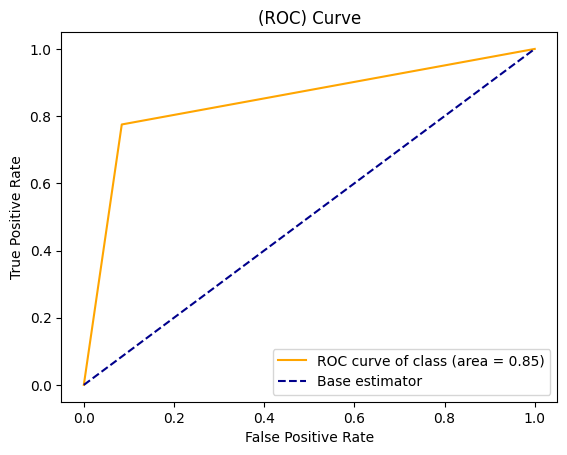

In [474]:
fpr, tpr, thresholds = roc_curve(y_test,y_est1 )
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

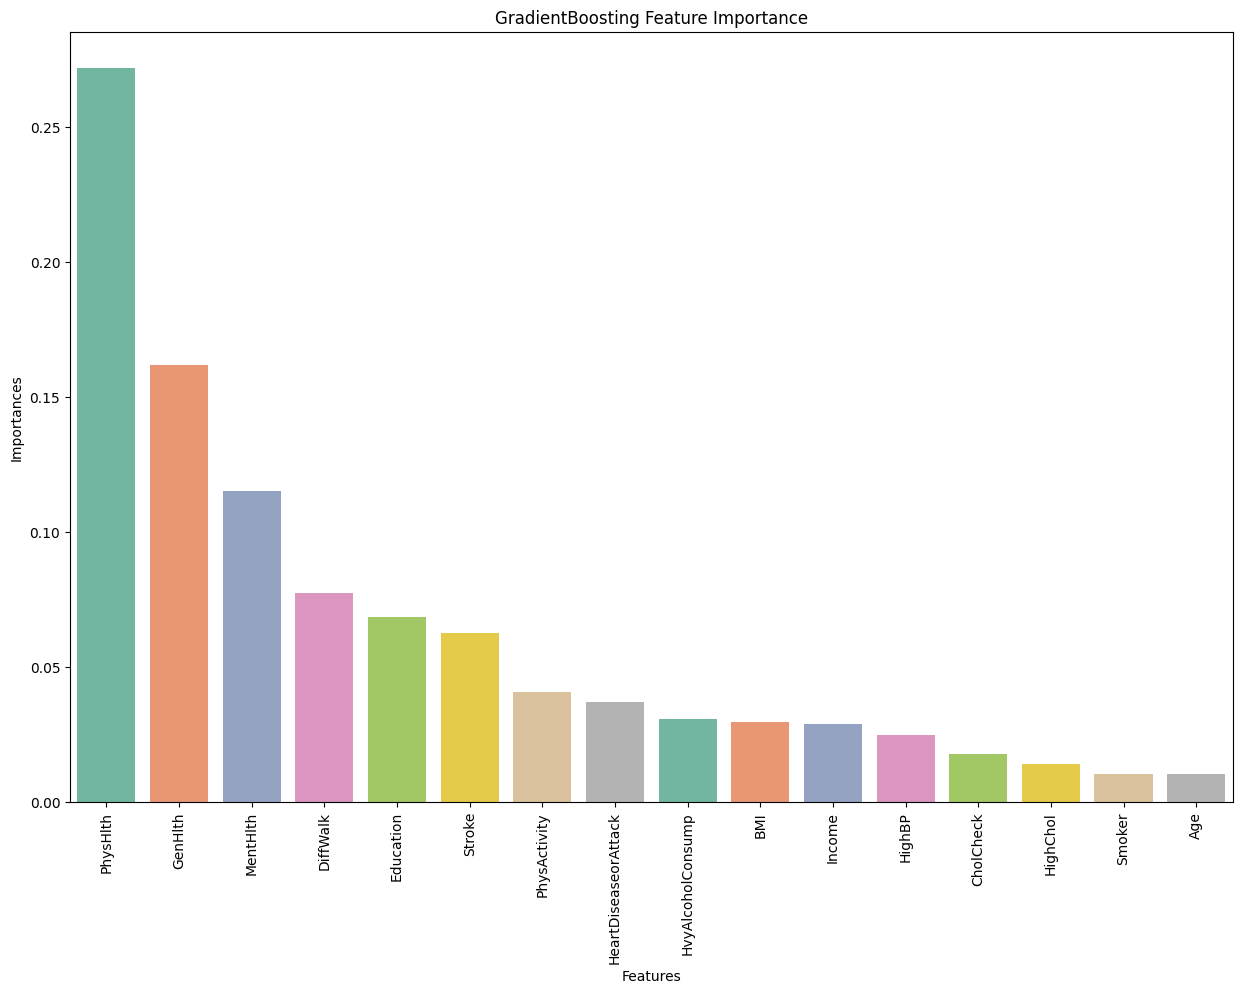

In [475]:
importances_GB = GB1.feature_importances_
columns = X1.columns

df_GB = pd.DataFrame({'Features': columns, 'Importances': importances_GB})
df_GB = df_XG.sort_values(by='Importances', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_GB, palette='Set2')
plt.title('GradientBoosting Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [538]:
joblib.dump(GB1, 'diabetes_GB_model.joblib')

['diabetes_GB_model.joblib']

## Comparing the results obtained

In [539]:
df_metrics = pd.concat([df_metrics_LG,df_metrics_RF,df_metrics_GB_HYPEROPT,df_metrics_GraB])

In [540]:
round(df_metrics.sort_values(by = ["Accuracy_test"]  ,ascending = False),2)

,Model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Model 1: LGBMClassifier,0.86,0.85,0.91,0.91,0.78,0.77,0.84,0.84,0.86,0.85
0,Model 3: XGBOOST - HYPEROPT,0.85,0.85,0.91,0.92,0.78,0.77,0.84,0.83,0.85,0.85
0,Model 4: GradientBoosting,0.85,0.85,0.90,0.90,0.79,0.78,0.84,0.83,0.85,0.85
0,Model 2: Random Forest,0.81,0.80,0.88,0.87,0.72,0.71,0.79,0.79,0.81,0.80


In [541]:
df_metrics_1 = df_metrics[["Model","Accuracy_test", "Precision_test","Recall_test","f1 score_test"]]

In [542]:
# I make a melt so that I can make a bar chart of each metric.
df_melt = pd.melt(
    df_metrics_1,
    id_vars=['Model'],
    value_vars=["Accuracy_test",
                "Precision_test",
                "Recall_test",
                "f1 score_test"], 
)

df_melt = df_melt.rename(columns={"Variable": "Metric", "Value": "value"})
# df_melt = df_melt.rename(columns={"Metric": "Variable", "value": "Value"})

In [543]:
df_melt 

,Model,variable,value
0,Model 1: LGBMClassifier,Accuracy_test,0.849349
1,Model 2: Random Forest,Accuracy_test,0.804103
2,Model 3: XGBOOST - HYPEROPT,Accuracy_test,0.846894
3,Model 4: GradientBoosting,Accuracy_test,0.845007
4,Model 1: LGBMClassifier,Precision_test,0.914412
5,Model 2: Random Forest,Precision_test,0.874617
6,Model 3: XGBOOST - HYPEROPT,Precision_test,0.915274
7,Model 4: GradientBoosting,Precision_test,0.903292
8,Model 1: LGBMClassifier,Recall_test,0.773153
9,Model 2: Random Forest,Recall_test,0.713161


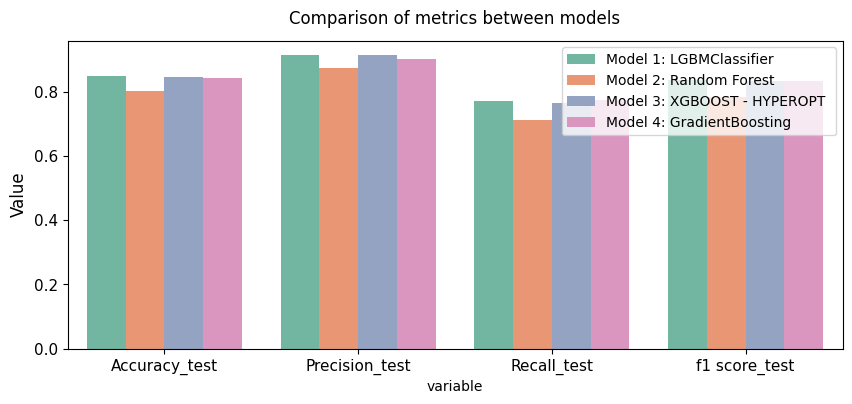

In [544]:
# I make a comparative bar chart of each of the metrics for each model.

fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="variable", y="value", hue="Model", data=df_melt, palette = "Set2")
ax.axes.set_title("Comparison of metrics between models",fontsize=12, pad=12)
ax.set_ylabel("Value",fontsize=12)
ax.tick_params(labelsize=11)
plt.legend(loc='upper right', fontsize='medium')

plt.show()

## Conclusions.

The diabetes health indicator dataset in Kaggle is an interesting resource for exploring machine learning techniques in the health field. 
By using this type of data, researchers and health professionals can gain insights into the various factors that contribute to the development and control of diabetes. With the help of machine learning algorithms, it is possible to identify patterns and predict outcomes that can aid in early diagnosis and prevention of the disease.

The dataset provides a general description of several health indicators, in my opinion, the questions of this survey do not provide attributes that allow us to provide accurate predictions about whether or not a person has diabetes, since it lacks fundamental indicators such as blood glucose, however, we can draw conclusions about what factors influence to a greater extent in people who suffer from the disease today and according to these characteristics or attributes suggest to people with higher risks to perform the necessary medical studies to confirm or rule out the hypothesis.

In this project we have explored data balancing techniques and machine learning classification algorithms with the aim of obtaining a predictive model with a minimum recall of 75% from a public dataset.

A comparison was made between all the trained algorithms, and it was established that the Xgboost, LGBMClassifier and GradientBoosting algorithms obtained the same recall of 77% for the test data.

Analyzing the rest of the calculated metrics, the algorithm that offers the best results for the subsampling data within the context of predicting diabetes disease is LGBMClassifier. 
We also note that LGBMClassifier shows an importance of each attribute according to the exploratory data analysis performed.